In [185]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [186]:
dataHP = pd.read_csv('train_hp.csv')
dataHP.shape

(1460, 81)

In [187]:
### Extraemos columnas con NAN

In [188]:
dataHP.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [189]:
dataHP['Alley'].isnull().sum()

1369

In [190]:
cols_con_na = [col for col in dataHP.columns if (dataHP[col].isnull().mean()>0)]
cols_con_na

['LotFrontage',
 'Alley',
 'MasVnrType',
 'MasVnrArea',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Electrical',
 'FireplaceQu',
 'GarageType',
 'GarageYrBlt',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PoolQC',
 'Fence',
 'MiscFeature']

In [191]:
dataHP['Alley'].isnull().mean()

0.9376712328767123

In [192]:
dataHP[cols_con_na].dtypes

LotFrontage     float64
Alley            object
MasVnrType       object
MasVnrArea      float64
BsmtQual         object
BsmtCond         object
BsmtExposure     object
BsmtFinType1     object
BsmtFinType2     object
Electrical       object
FireplaceQu      object
GarageType       object
GarageYrBlt     float64
GarageFinish     object
GarageQual       object
GarageCond       object
PoolQC           object
Fence            object
MiscFeature      object
dtype: object

In [193]:
prop_nan_per_col = dataHP[cols_con_na].isnull().mean()
prop_nan_per_col

LotFrontage     0.177397
Alley           0.937671
MasVnrType      0.005479
MasVnrArea      0.005479
BsmtQual        0.025342
BsmtCond        0.025342
BsmtExposure    0.026027
BsmtFinType1    0.025342
BsmtFinType2    0.026027
Electrical      0.000685
FireplaceQu     0.472603
GarageType      0.055479
GarageYrBlt     0.055479
GarageFinish    0.055479
GarageQual      0.055479
GarageCond      0.055479
PoolQC          0.995205
Fence           0.807534
MiscFeature     0.963014
dtype: float64

In [194]:
cols_rescatables = [col for col in dataHP.columns if (dataHP[col].isnull().mean()<=0.05)]
cols_rescatables

['Id',
 'MSSubClass',
 'MSZoning',
 'LotArea',
 'Street',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'OverallQual',
 'OverallCond',
 'YearBuilt',
 'YearRemodAdd',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'MasVnrArea',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinSF1',
 'BsmtFinType2',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'KitchenQual',
 'TotRmsAbvGrd',
 'Functional',
 'Fireplaces',
 'GarageCars',
 'GarageArea',
 'PavedDrive',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 '3SsnPorch',
 'ScreenPorch',
 'PoolArea',
 'MiscVal',
 'MoSold',
 'YrSold',
 'SaleType',
 'SaleCond

In [195]:
### Complete case analysis (CCA)
##Dejamos solo las columnas que tiene casos completos, es decir no tienen ningun nulo.

In [196]:
data_HP_noNAN = dataHP[cols_rescatables].dropna()
dataHP.shape, data_HP_noNAN.shape

((1460, 81), (1412, 70))

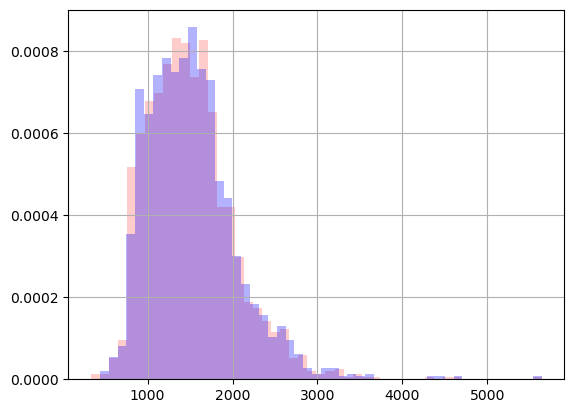

In [197]:
dataHP['GrLivArea'].hist(bins=50, density=True, color='red', alpha= 0.2)
data_HP_noNAN['GrLivArea'].hist(bins=50, density=True, color='blue', alpha=0.3)
plt.show()

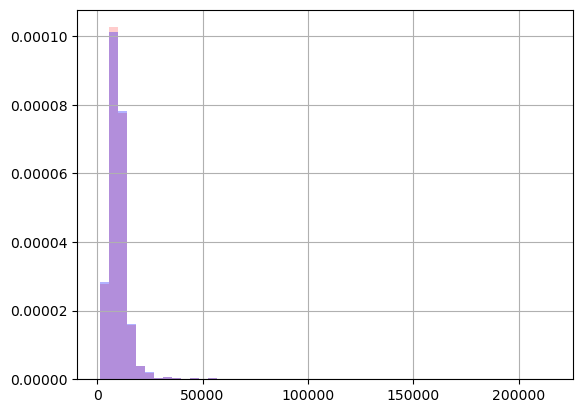

In [198]:
dataHP['LotArea'].hist(bins=50, density=True, color='red', alpha= 0.2)
data_HP_noNAN['LotArea'].hist(bins=50, density=True, color='blue', alpha=0.3)
plt.show()

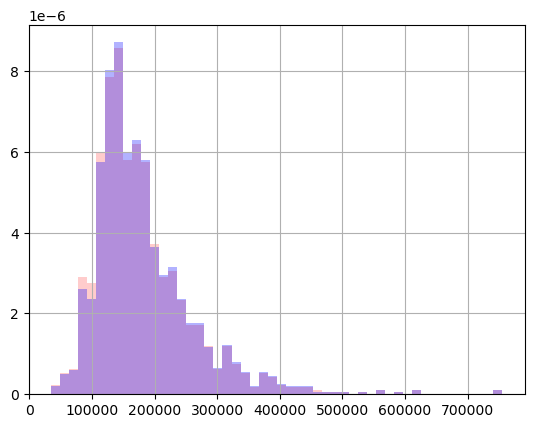

In [199]:
dataHP['SalePrice'].hist(bins=50, density=True, color='red', alpha= 0.2)
data_HP_noNAN['SalePrice'].hist(bins=50, density=True, color='blue', alpha=0.3)
plt.show()

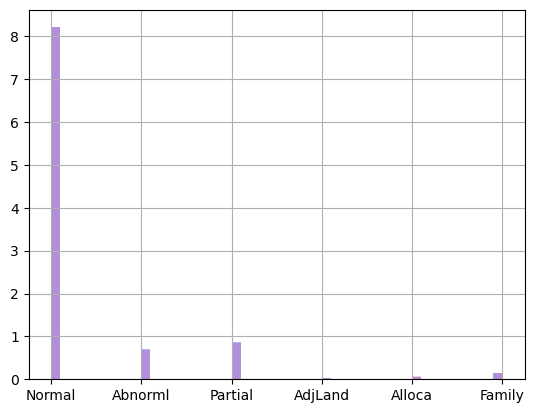

In [200]:
dataHP['SaleCondition'].hist(bins=50, density=True, color='red', alpha= 0.2)
data_HP_noNAN['SaleCondition'].hist(bins=50, density=True, color='blue', alpha=0.3)
plt.show()

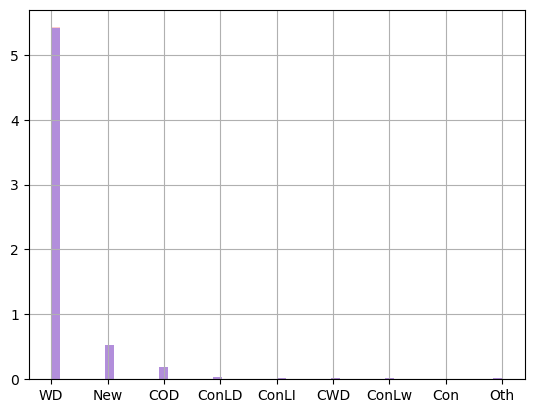

In [201]:
dataHP['SaleType'].hist(bins=50, density=True, color='red', alpha= 0.2)
data_HP_noNAN['SaleType'].hist(bins=50, density=True, color='blue', alpha=0.3)
plt.show()

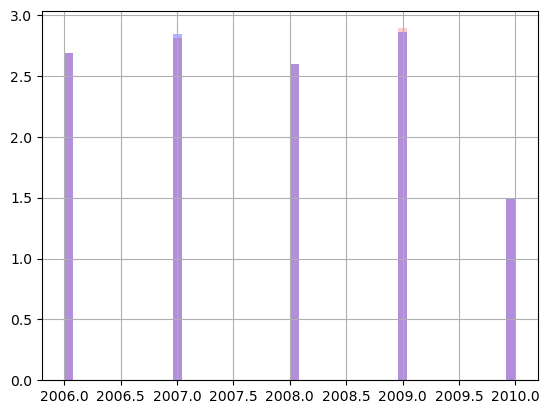

In [202]:
dataHP['YrSold'].hist(bins=50, density=True, color='red', alpha= 0.2)
data_HP_noNAN['YrSold'].hist(bins=50, density=True, color='blue', alpha=0.3)
plt.show()

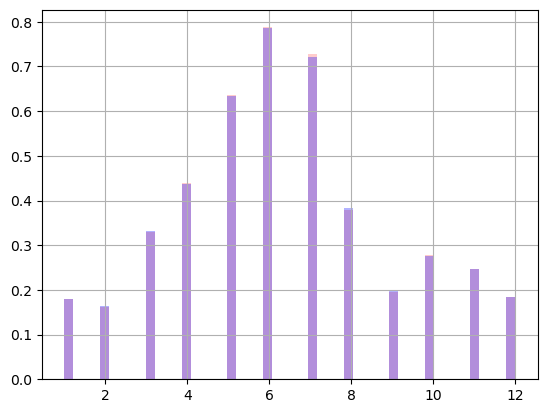

In [203]:
dataHP['MoSold'].hist(bins=50, density=True, color='red', alpha= 0.2)
data_HP_noNAN['MoSold'].hist(bins=50, density=True, color='blue', alpha=0.3)
plt.show()

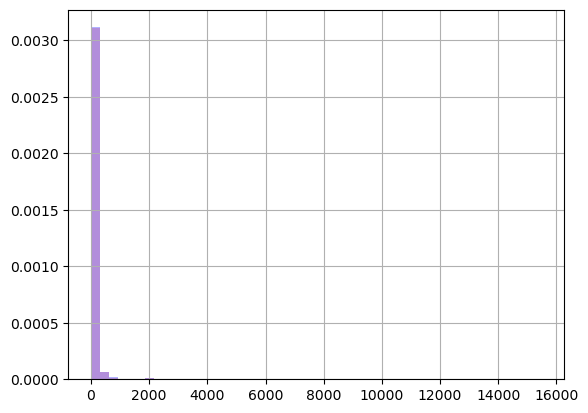

In [204]:
dataHP['MiscVal'].hist(bins=50, density=True, color='red', alpha= 0.2)
data_HP_noNAN['MiscVal'].hist(bins=50, density=True, color='blue', alpha=0.3)
plt.show()

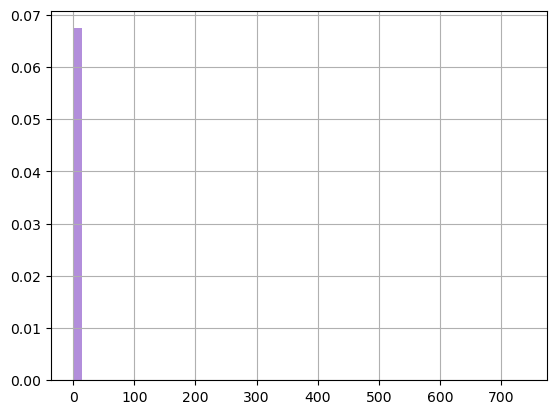

In [205]:
dataHP['PoolArea'].hist(bins=50, density=True, color='red', alpha= 0.2)
data_HP_noNAN['PoolArea'].hist(bins=50, density=True, color='blue', alpha=0.3)
plt.show()

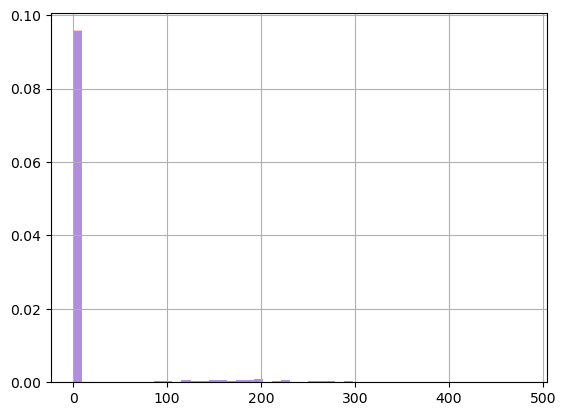

In [206]:
dataHP['ScreenPorch'].hist(bins=50, density=True, color='red', alpha= 0.2)
data_HP_noNAN['ScreenPorch'].hist(bins=50, density=True, color='blue', alpha=0.3)
plt.show()

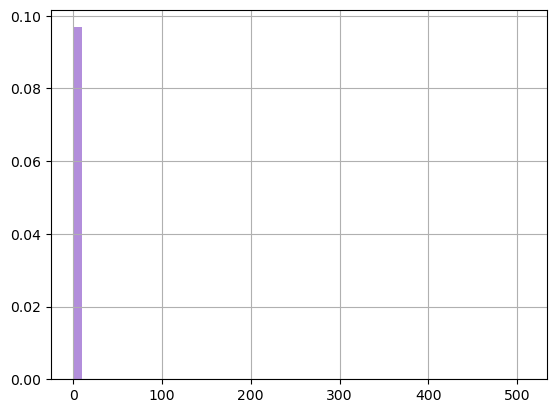

In [207]:
dataHP['3SsnPorch'].hist(bins=50, density=True, color='red', alpha= 0.2)
data_HP_noNAN['3SsnPorch'].hist(bins=50, density=True, color='blue', alpha=0.3)
plt.show()

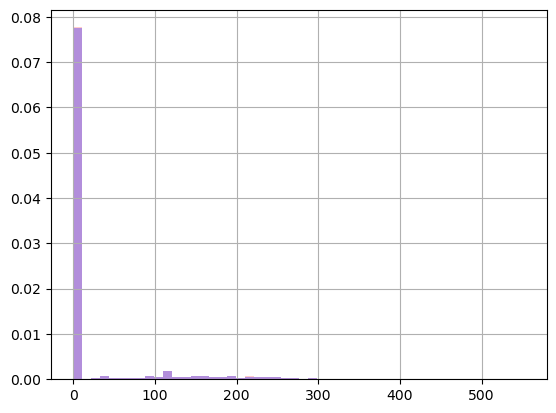

In [208]:
dataHP['EnclosedPorch'].hist(bins=50, density=True, color='red', alpha= 0.2)
data_HP_noNAN['EnclosedPorch'].hist(bins=50, density=True, color='blue', alpha=0.3)
plt.show()

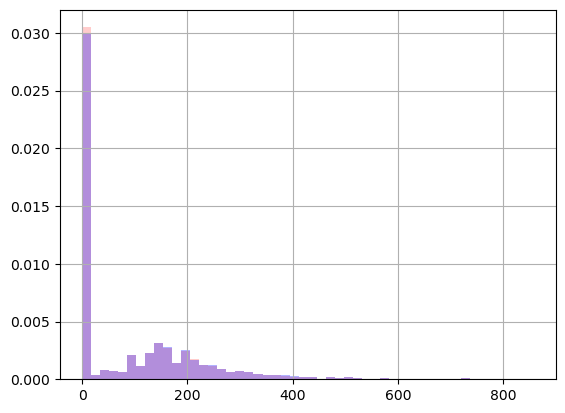

In [209]:
dataHP['WoodDeckSF'].hist(bins=50, density=True, color='red', alpha= 0.2)
data_HP_noNAN['WoodDeckSF'].hist(bins=50, density=True, color='blue', alpha=0.3)
plt.show()

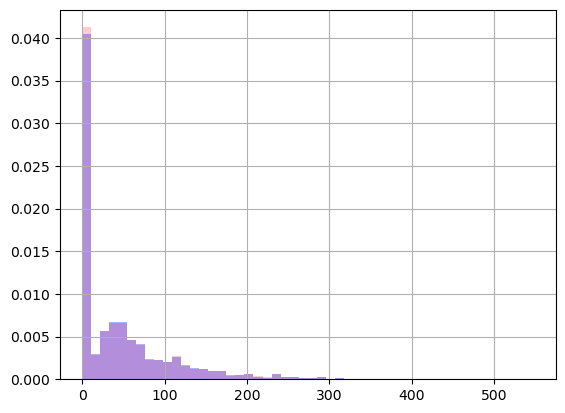

In [210]:
dataHP['OpenPorchSF'].hist(bins=50, density=True, color='red', alpha= 0.2)
data_HP_noNAN['OpenPorchSF'].hist(bins=50, density=True, color='blue', alpha=0.3)
plt.show()

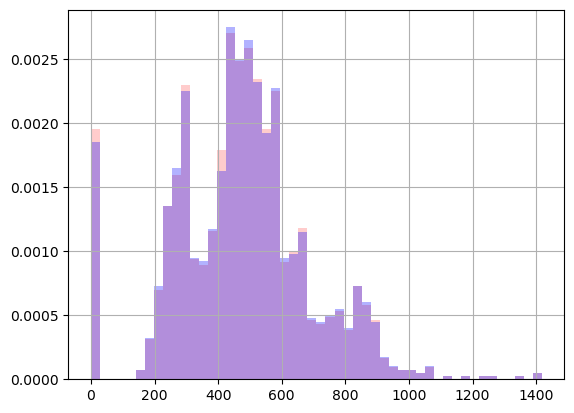

In [211]:
dataHP['GarageArea'].hist(bins=50, density=True, color='red', alpha= 0.2)
data_HP_noNAN['GarageArea'].hist(bins=50, density=True, color='blue', alpha=0.3)
plt.show()

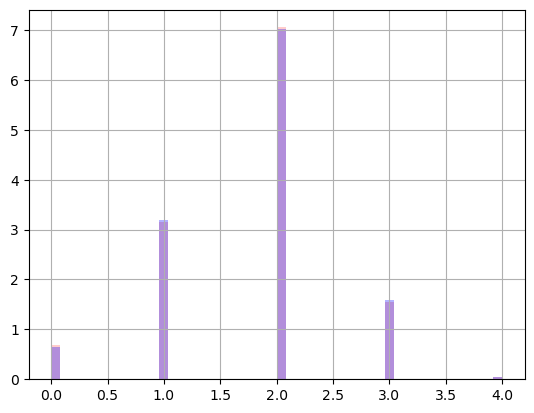

In [212]:
dataHP['GarageCars'].hist(bins=50, density=True, color='red', alpha= 0.2)
data_HP_noNAN['GarageCars'].hist(bins=50, density=True, color='blue', alpha=0.3)
plt.show()

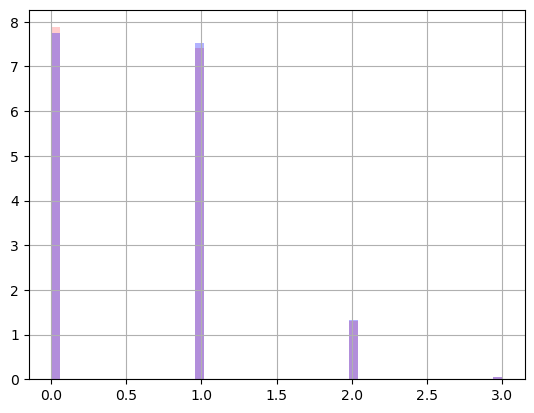

In [213]:
dataHP['Fireplaces'].hist(bins=50, density=True, color='red', alpha= 0.2)
data_HP_noNAN['Fireplaces'].hist(bins=50, density=True, color='blue', alpha=0.3)
plt.show()

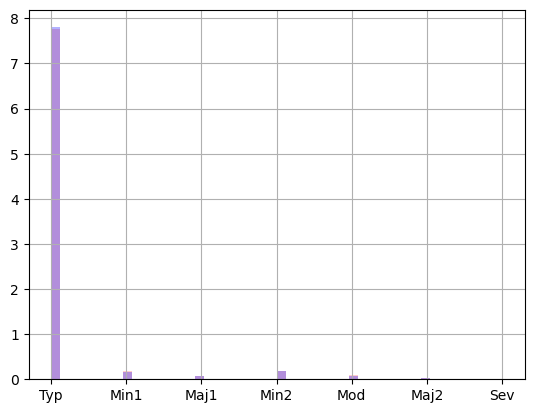

In [214]:
dataHP['Functional'].hist(bins=50, density=True, color='red', alpha= 0.2)
data_HP_noNAN['Functional'].hist(bins=50, density=True, color='blue', alpha=0.3)
plt.show()

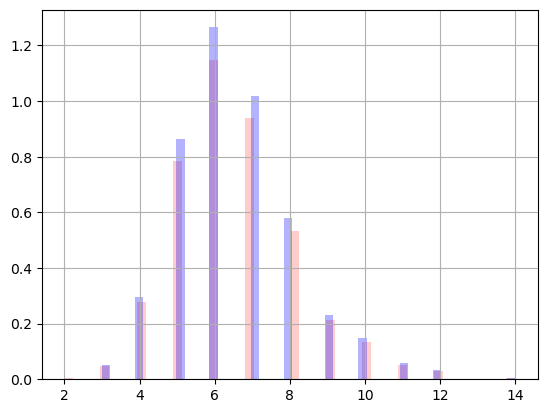

In [215]:
dataHP['TotRmsAbvGrd'].hist(bins=50, density=True, color='red', alpha= 0.2)
data_HP_noNAN['TotRmsAbvGrd'].hist(bins=50, density=True, color='blue', alpha=0.3)
plt.show()

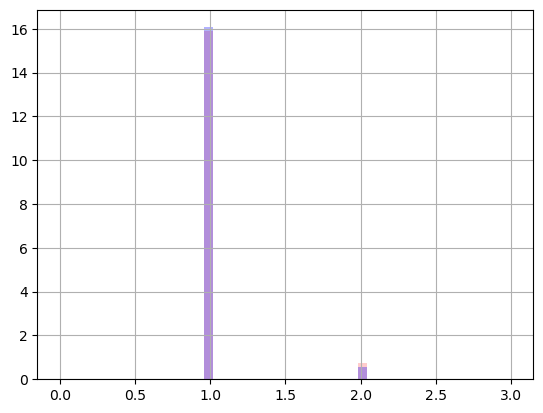

In [216]:
dataHP['KitchenAbvGr'].hist(bins=50, density=True, color='red', alpha= 0.2)
data_HP_noNAN['KitchenAbvGr'].hist(bins=50, density=True, color='blue', alpha=0.3)
plt.show()

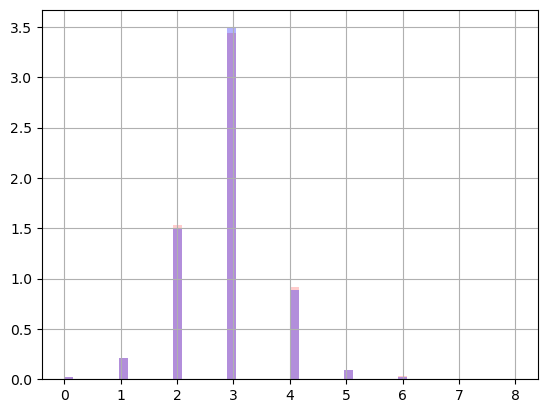

In [217]:
dataHP['BedroomAbvGr'].hist(bins=50, density=True, color='red', alpha= 0.2)
data_HP_noNAN['BedroomAbvGr'].hist(bins=50, density=True, color='blue', alpha=0.3)
plt.show()

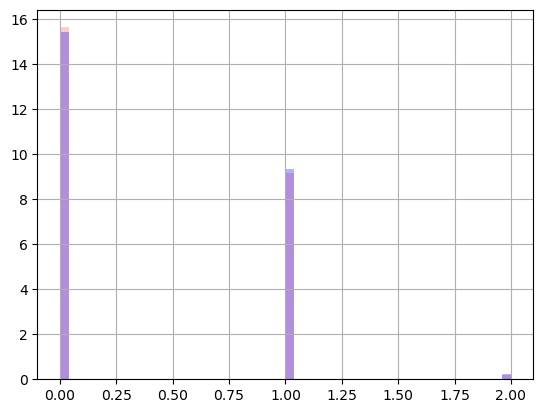

In [218]:
dataHP['HalfBath'].hist(bins=50, density=True, color='red', alpha= 0.2)
data_HP_noNAN['HalfBath'].hist(bins=50, density=True, color='blue', alpha=0.3)
plt.show()

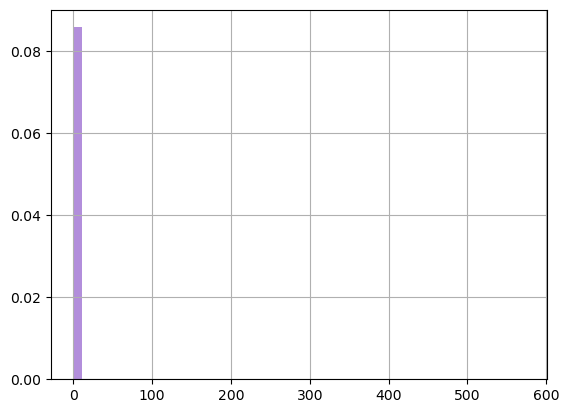

In [219]:
dataHP['LowQualFinSF'].hist(bins=50, density=True, color='red', alpha= 0.2)
data_HP_noNAN['LowQualFinSF'].hist(bins=50, density=True, color='blue', alpha=0.3)
plt.show()

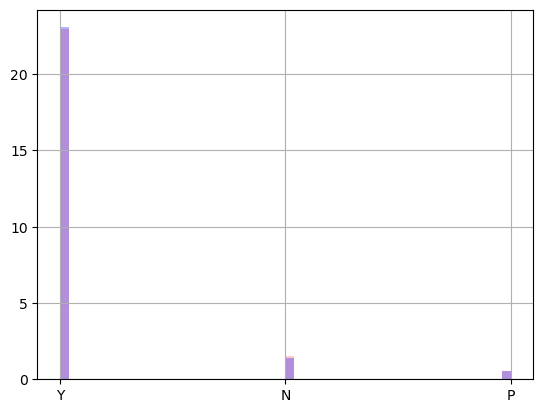

In [220]:
dataHP['PavedDrive'].hist(bins=50, density=True, color='red', alpha= 0.2)
data_HP_noNAN['PavedDrive'].hist(bins=50, density=True, color='blue', alpha=0.3)
plt.show()

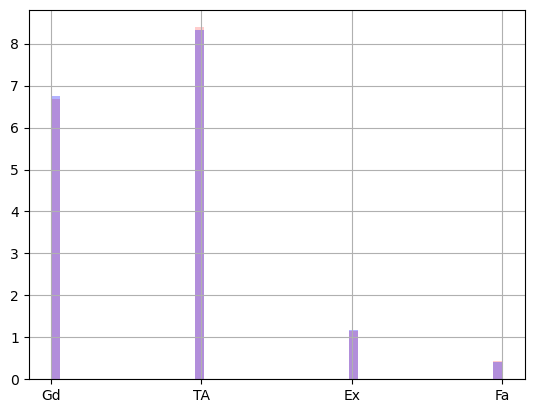

In [221]:
dataHP['KitchenQual'].hist(bins=50, density=True, color='red', alpha= 0.2)
data_HP_noNAN['KitchenQual'].hist(bins=50, density=True, color='blue', alpha=0.3)
plt.show()

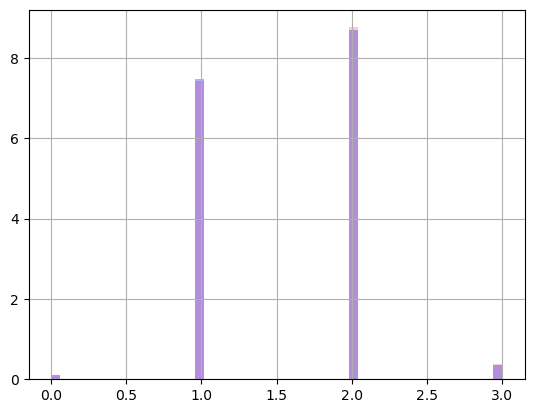

In [222]:
dataHP['FullBath'].hist(bins=50, density=True, color='red', alpha= 0.2)
data_HP_noNAN['FullBath'].hist(bins=50, density=True, color='blue', alpha=0.3)
plt.show()

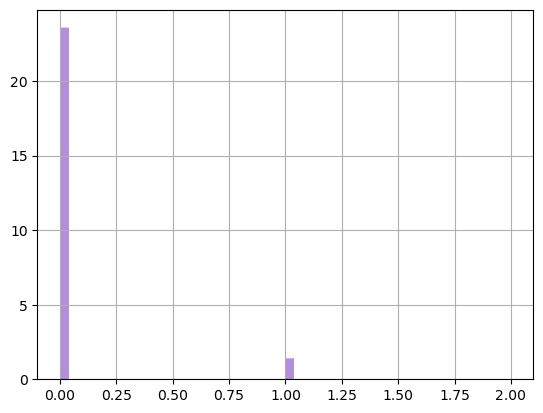

In [223]:
dataHP['BsmtHalfBath'].hist(bins=50, density=True, color='red', alpha= 0.2)
data_HP_noNAN['BsmtHalfBath'].hist(bins=50, density=True, color='blue', alpha=0.3)
plt.show()

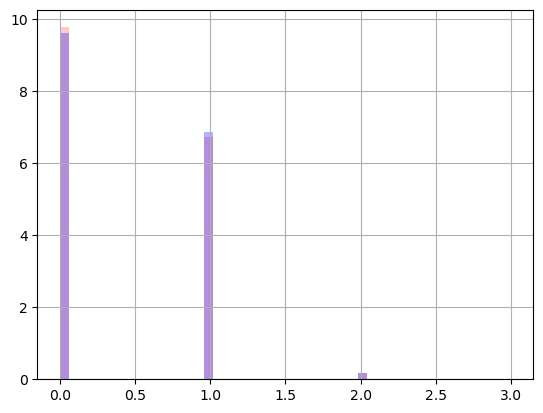

In [224]:
dataHP['BsmtFullBath'].hist(bins=50, density=True, color='red', alpha= 0.2)
data_HP_noNAN['BsmtFullBath'].hist(bins=50, density=True, color='blue', alpha=0.3)
plt.show()

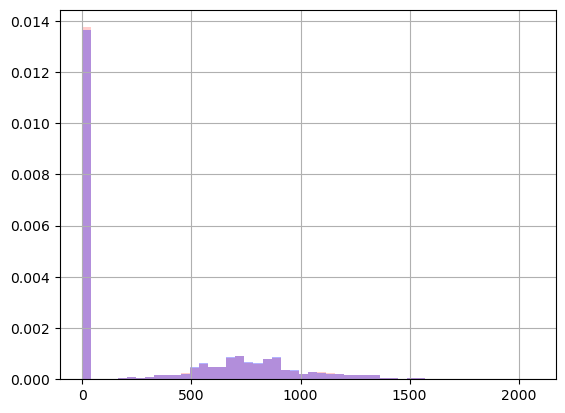

In [225]:
dataHP['2ndFlrSF'].hist(bins=50, density=True, color='red', alpha= 0.2)
data_HP_noNAN['2ndFlrSF'].hist(bins=50, density=True, color='blue', alpha=0.3)
plt.show()

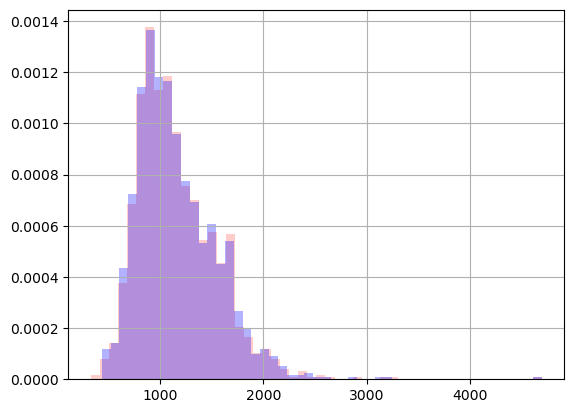

In [226]:
dataHP['1stFlrSF'].hist(bins=50, density=True, color='red', alpha= 0.2)
data_HP_noNAN['1stFlrSF'].hist(bins=50, density=True, color='blue', alpha=0.3)
plt.show()

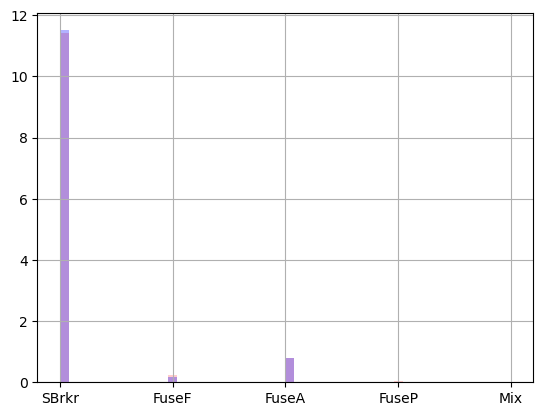

In [227]:
dataHP['Electrical'].hist(bins=50, density=True, color='red', alpha= 0.2)
data_HP_noNAN['Electrical'].hist(bins=50, density=True, color='blue', alpha=0.3)
plt.show()

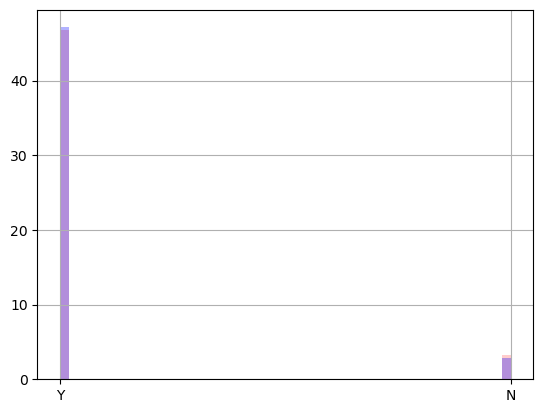

In [228]:
dataHP['CentralAir'].hist(bins=50, density=True, color='red', alpha= 0.2)
data_HP_noNAN['CentralAir'].hist(bins=50, density=True, color='blue', alpha=0.3)
plt.show()

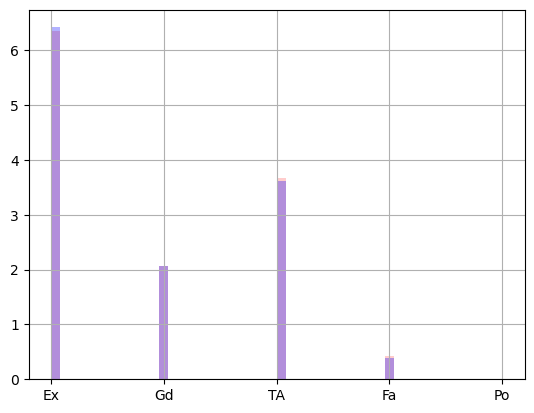

In [229]:
dataHP['HeatingQC'].hist(bins=50, density=True, color='red', alpha= 0.2)
data_HP_noNAN['HeatingQC'].hist(bins=50, density=True, color='blue', alpha=0.3)
plt.show()

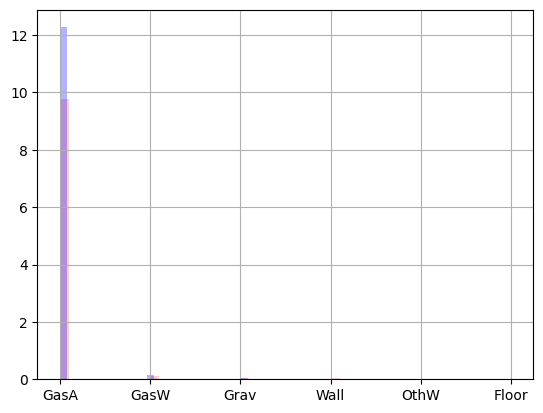

In [230]:
dataHP['Heating'].hist(bins=50, density=True, color='red', alpha= 0.2)
data_HP_noNAN['Heating'].hist(bins=50, density=True, color='blue', alpha=0.3)
plt.show()

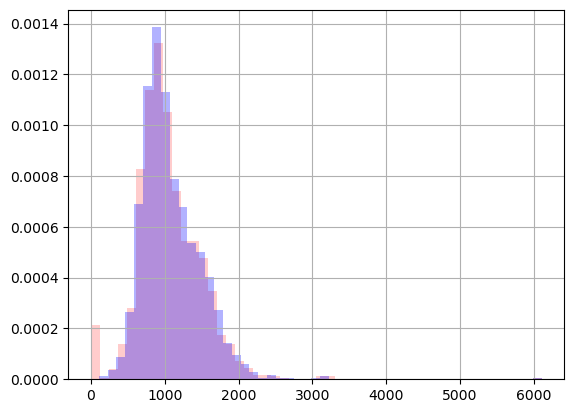

In [231]:
dataHP['TotalBsmtSF'].hist(bins=50, density=True, color='red', alpha= 0.2)
data_HP_noNAN['TotalBsmtSF'].hist(bins=50, density=True, color='blue', alpha=0.3)
plt.show()

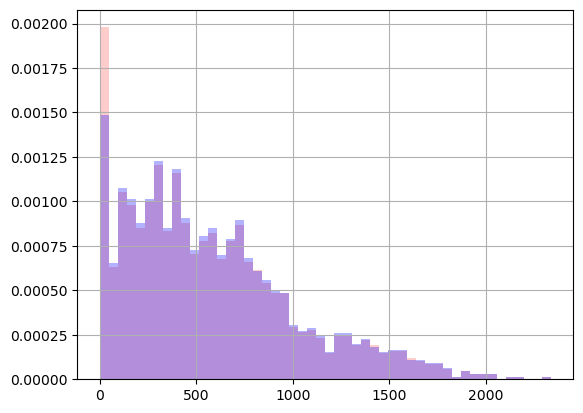

In [232]:
dataHP['BsmtUnfSF'].hist(bins=50, density=True, color='red', alpha= 0.2)
data_HP_noNAN['BsmtUnfSF'].hist(bins=50, density=True, color='blue', alpha=0.3)
plt.show()

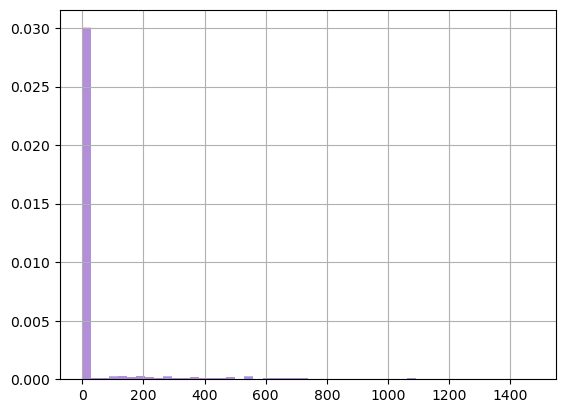

In [233]:
dataHP['BsmtFinSF2'].hist(bins=50, density=True, color='red', alpha= 0.2)
data_HP_noNAN['BsmtFinSF2'].hist(bins=50, density=True, color='blue', alpha=0.3)
plt.show()

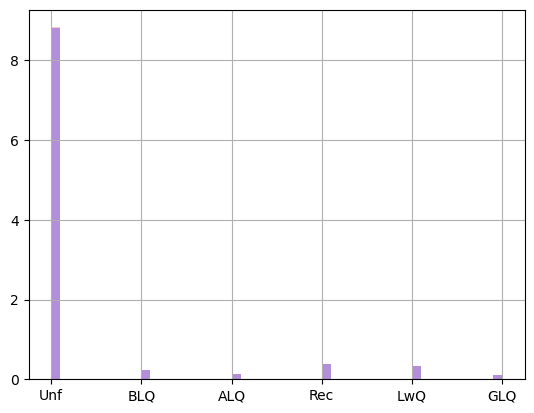

In [234]:
dataHP['BsmtFinType2'].hist(bins=50, density=True, color='red', alpha= 0.2)
data_HP_noNAN['BsmtFinType2'].hist(bins=50, density=True, color='blue', alpha=0.3)
plt.show()

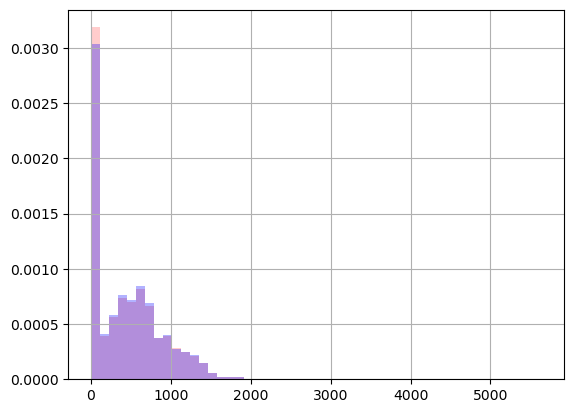

In [235]:
dataHP['BsmtFinSF1'].hist(bins=50, density=True, color='red', alpha= 0.2)
data_HP_noNAN['BsmtFinSF1'].hist(bins=50, density=True, color='blue', alpha=0.3)
plt.show()

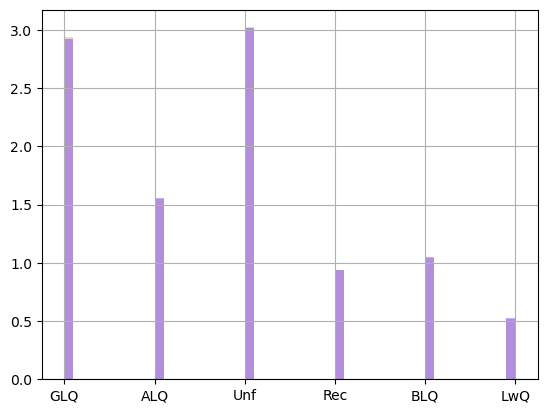

In [236]:
dataHP['BsmtFinType1'].hist(bins=50, density=True, color='red', alpha= 0.2)
data_HP_noNAN['BsmtFinType1'].hist(bins=50, density=True, color='blue', alpha=0.3)
plt.show()

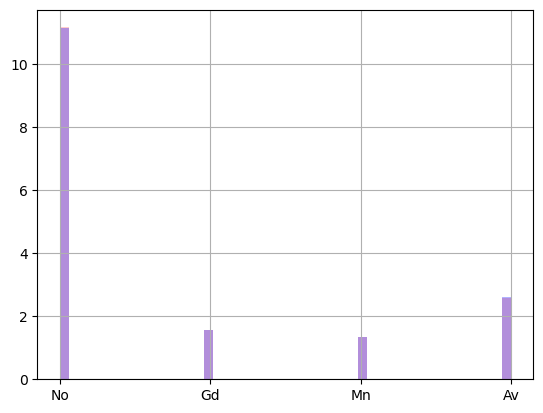

In [237]:
dataHP['BsmtExposure'].hist(bins=50, density=True, color='red', alpha= 0.2)
data_HP_noNAN['BsmtExposure'].hist(bins=50, density=True, color='blue', alpha=0.3)
plt.show()

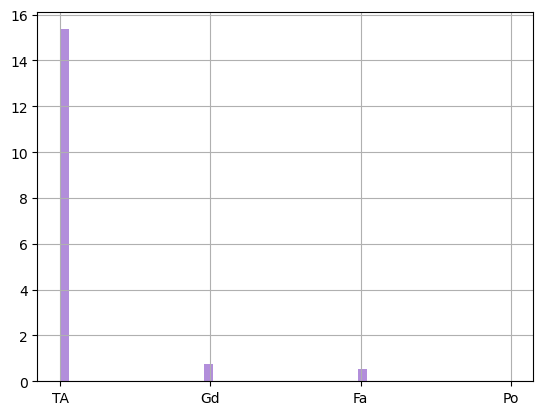

In [238]:
dataHP['BsmtCond'].hist(bins=50, density=True, color='red', alpha= 0.2)
data_HP_noNAN['BsmtCond'].hist(bins=50, density=True, color='blue', alpha=0.3)
plt.show()

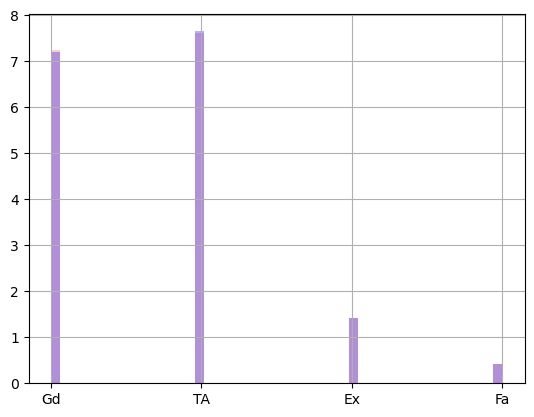

In [239]:
dataHP['BsmtQual'].hist(bins=50, density=True, color='red', alpha= 0.2)
data_HP_noNAN['BsmtQual'].hist(bins=50, density=True, color='blue', alpha=0.3)
plt.show()

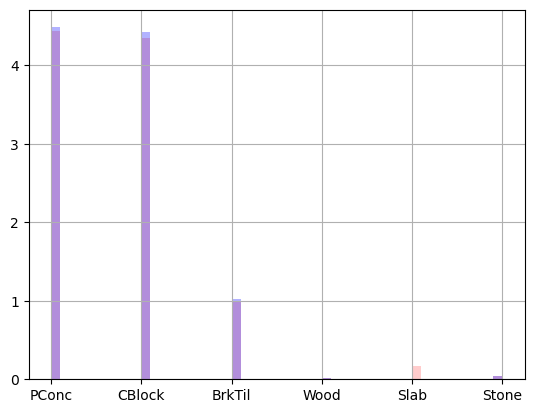

In [240]:
dataHP['Foundation'].hist(bins=50, density=True, color='red', alpha= 0.2)
data_HP_noNAN['Foundation'].hist(bins=50, density=True, color='blue', alpha=0.3)
plt.show()

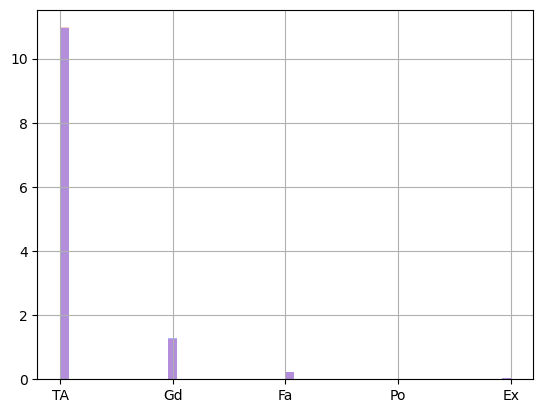

In [241]:
dataHP['ExterCond'].hist(bins=50, density=True, color='red', alpha= 0.2)
data_HP_noNAN['ExterCond'].hist(bins=50, density=True, color='blue', alpha=0.3)
plt.show()

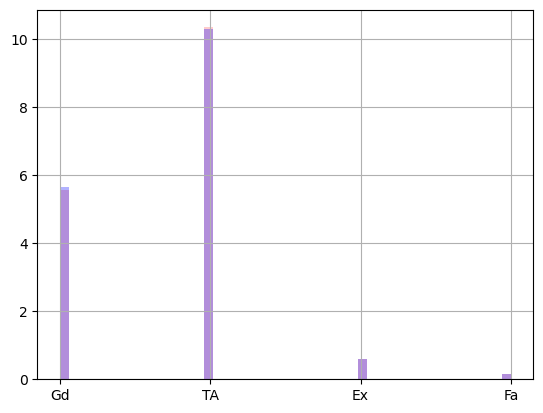

In [242]:
dataHP['ExterQual'].hist(bins=50, density=True, color='red', alpha= 0.2)
data_HP_noNAN['ExterQual'].hist(bins=50, density=True, color='blue', alpha=0.3)
plt.show()

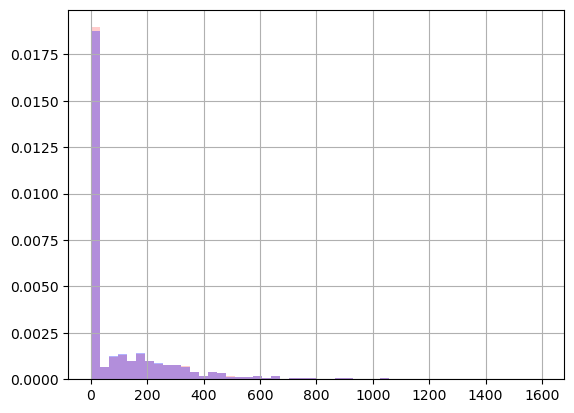

In [243]:
dataHP['MasVnrArea'].hist(bins=50, density=True, color='red', alpha= 0.2)
data_HP_noNAN['MasVnrArea'].hist(bins=50, density=True, color='blue', alpha=0.3)
plt.show()

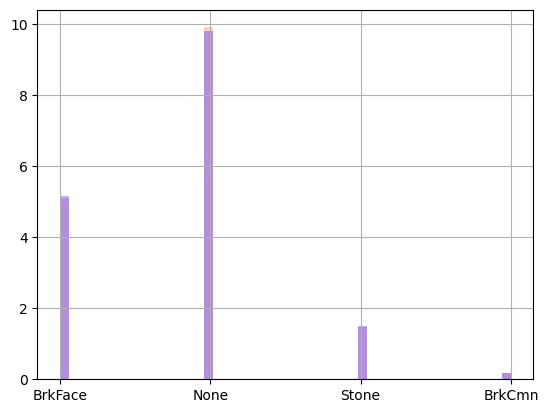

In [244]:
dataHP['MasVnrType'].hist(bins=50, density=True, color='red', alpha= 0.2)
data_HP_noNAN['MasVnrType'].hist(bins=50, density=True, color='blue', alpha=0.3)
plt.show()

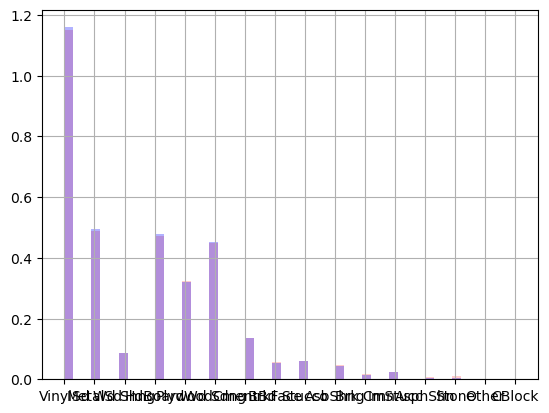

In [245]:
dataHP['Exterior2nd'].hist(bins=50, density=True, color='red', alpha= 0.2)
data_HP_noNAN['Exterior2nd'].hist(bins=50, density=True, color='blue', alpha=0.3)
plt.show()

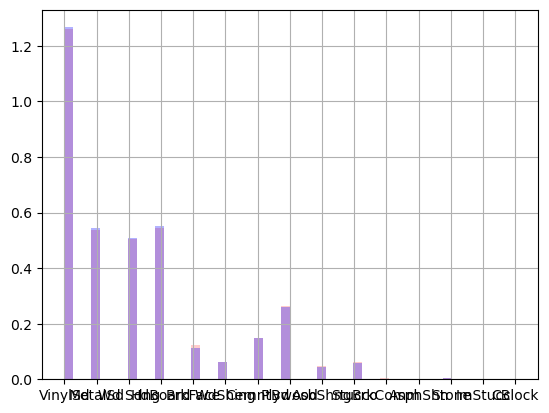

In [246]:
dataHP['Exterior1st'].hist(bins=50, density=True, color='red', alpha= 0.2)
data_HP_noNAN['Exterior1st'].hist(bins=50, density=True, color='blue', alpha=0.3)
plt.show()

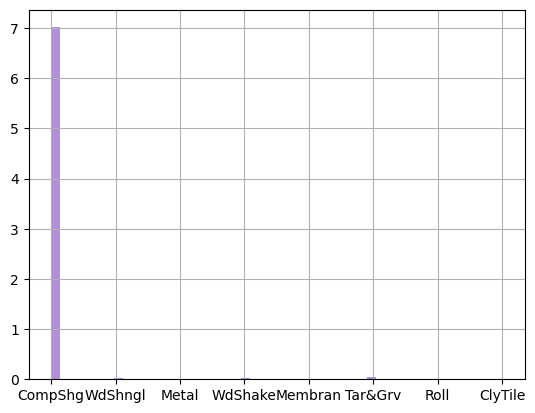

In [247]:
dataHP['RoofMatl'].hist(bins=50, density=True, color='red', alpha= 0.2)
data_HP_noNAN['RoofMatl'].hist(bins=50, density=True, color='blue', alpha=0.3)
plt.show()

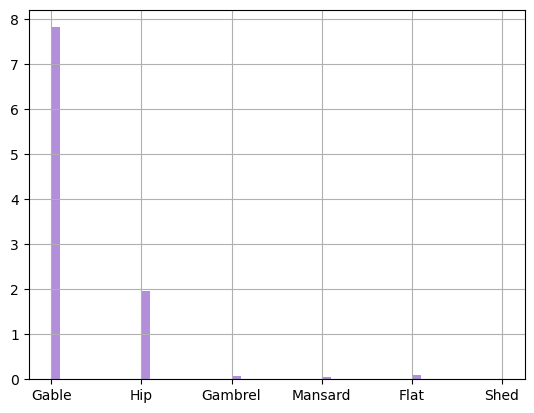

In [248]:
dataHP['RoofStyle'].hist(bins=50, density=True, color='red', alpha= 0.2)
data_HP_noNAN['RoofStyle'].hist(bins=50, density=True, color='blue', alpha=0.3)
plt.show()

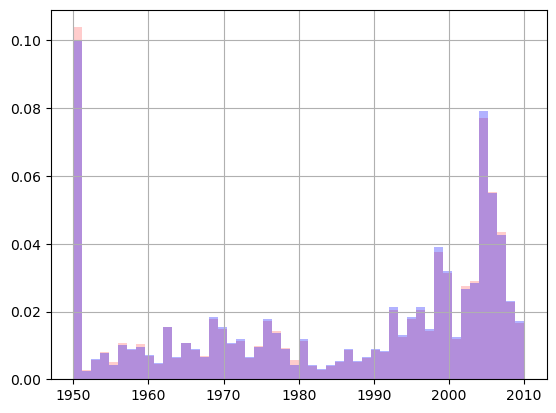

In [249]:
dataHP['YearRemodAdd'].hist(bins=50, density=True, color='red', alpha= 0.2)
data_HP_noNAN['YearRemodAdd'].hist(bins=50, density=True, color='blue', alpha=0.3)
plt.show()

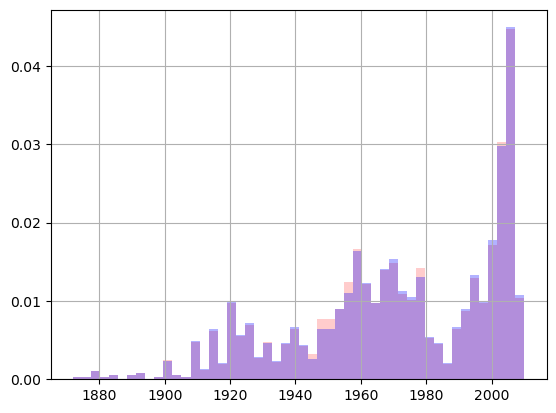

In [250]:
dataHP['YearBuilt'].hist(bins=50, density=True, color='red', alpha= 0.2)
data_HP_noNAN['YearBuilt'].hist(bins=50, density=True, color='blue', alpha=0.3)
plt.show()

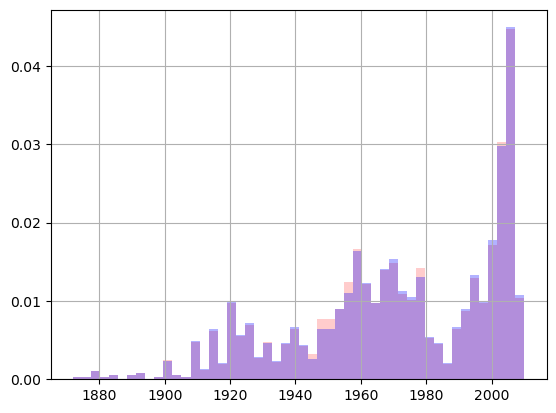

In [251]:
dataHP['YearBuilt'].hist(bins=50, density=True, color='red', alpha= 0.2)
data_HP_noNAN['YearBuilt'].hist(bins=50, density=True, color='blue', alpha=0.3)
plt.show()

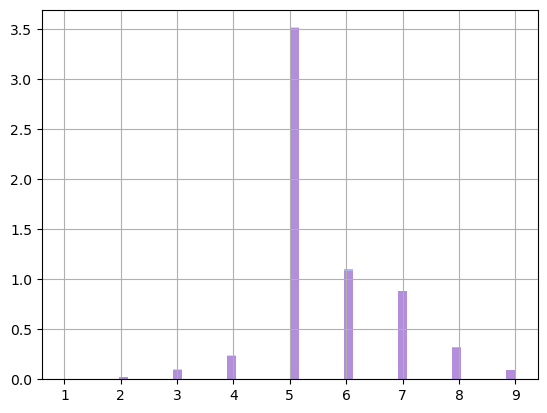

In [252]:
dataHP['OverallCond'].hist(bins=50, density=True, color='red', alpha= 0.2)
data_HP_noNAN['OverallCond'].hist(bins=50, density=True, color='blue', alpha=0.3)
plt.show()

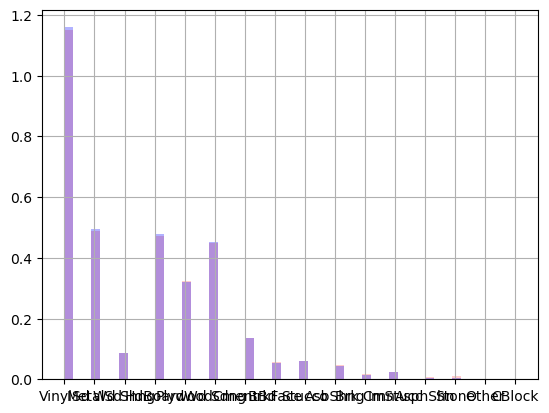

In [253]:
dataHP['Exterior2nd'].hist(bins=50, density=True, color='red', alpha= 0.2)
data_HP_noNAN['Exterior2nd'].hist(bins=50, density=True, color='blue', alpha=0.3)
plt.show()

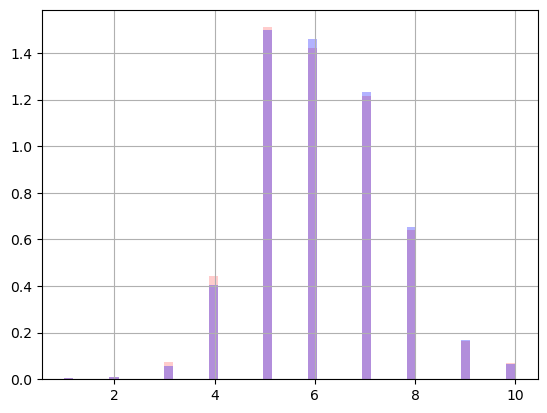

In [254]:
dataHP['OverallQual'].hist(bins=50, density=True, color='red', alpha= 0.2)
data_HP_noNAN['OverallQual'].hist(bins=50, density=True, color='blue', alpha=0.3)
plt.show()

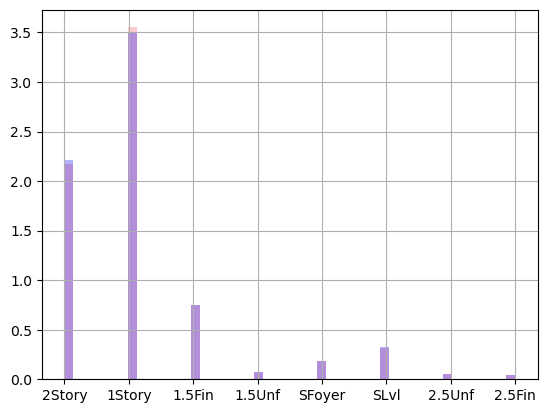

In [255]:
dataHP['HouseStyle'].hist(bins=50, density=True, color='red', alpha= 0.2)
data_HP_noNAN['HouseStyle'].hist(bins=50, density=True, color='blue', alpha=0.3)
plt.show()

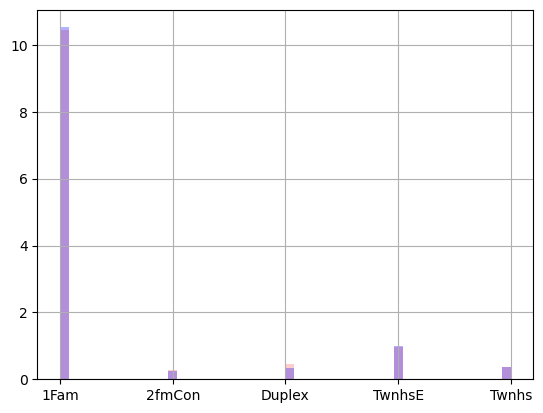

In [256]:
dataHP['BldgType'].hist(bins=50, density=True, color='red', alpha= 0.2)
data_HP_noNAN['BldgType'].hist(bins=50, density=True, color='blue', alpha=0.3)
plt.show()

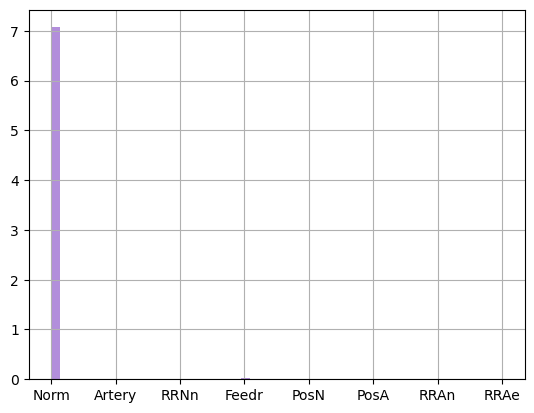

In [257]:
dataHP['Condition2'].hist(bins=50, density=True, color='red', alpha= 0.2)
data_HP_noNAN['Condition2'].hist(bins=50, density=True, color='blue', alpha=0.3)
plt.show()

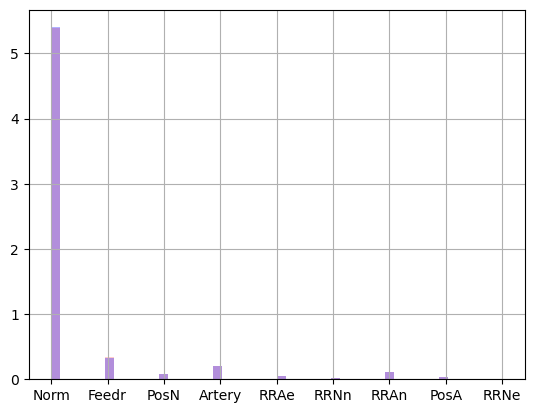

In [258]:
dataHP['Condition1'].hist(bins=50, density=True, color='red', alpha= 0.2)
data_HP_noNAN['Condition1'].hist(bins=50, density=True, color='blue', alpha=0.3)
plt.show()

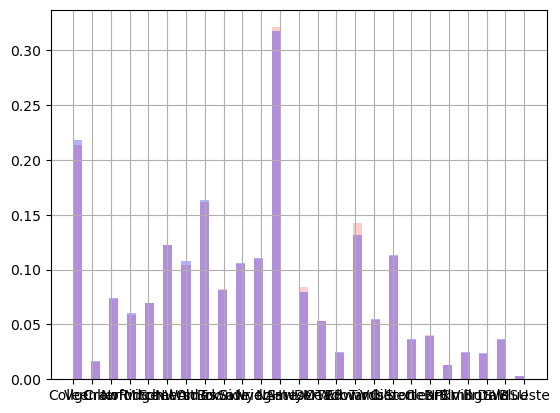

In [259]:
dataHP['Neighborhood'].hist(bins=50, density=True, color='red', alpha= 0.2)
data_HP_noNAN['Neighborhood'].hist(bins=50, density=True, color='blue', alpha=0.3)
plt.show()

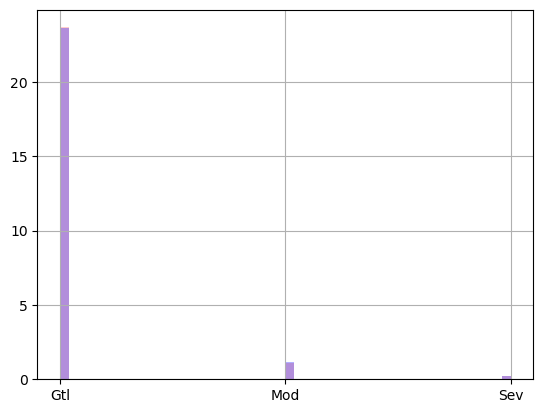

In [260]:
dataHP['LandSlope'].hist(bins=50, density=True, color='red', alpha= 0.2)
data_HP_noNAN['LandSlope'].hist(bins=50, density=True, color='blue', alpha=0.3)
plt.show()

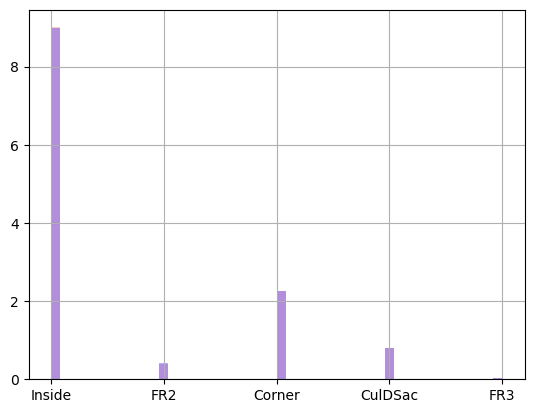

In [261]:
dataHP['LotConfig'].hist(bins=50, density=True, color='red', alpha= 0.2)
data_HP_noNAN['LotConfig'].hist(bins=50, density=True, color='blue', alpha=0.3)
plt.show()

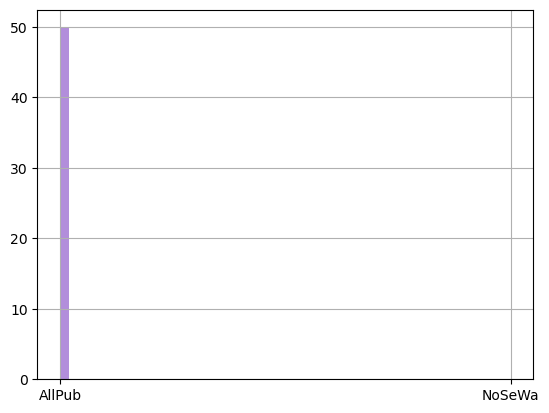

In [262]:
dataHP['Utilities'].hist(bins=50, density=True, color='red', alpha= 0.2)
data_HP_noNAN['Utilities'].hist(bins=50, density=True, color='blue', alpha=0.3)
plt.show()

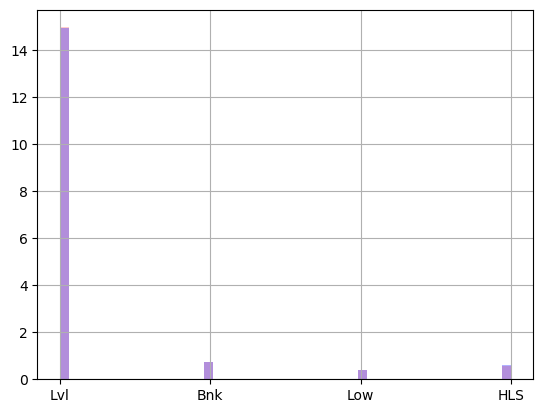

In [263]:
dataHP['LandContour'].hist(bins=50, density=True, color='red', alpha= 0.2)
data_HP_noNAN['LandContour'].hist(bins=50, density=True, color='blue', alpha=0.3)
plt.show()

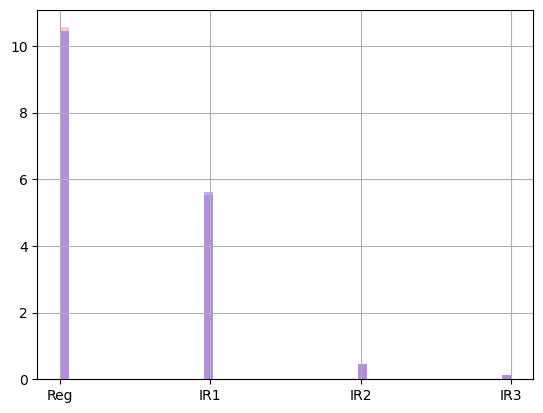

In [264]:
dataHP['LotShape'].hist(bins=50, density=True, color='red', alpha= 0.2)
data_HP_noNAN['LotShape'].hist(bins=50, density=True, color='blue', alpha=0.3)
plt.show()

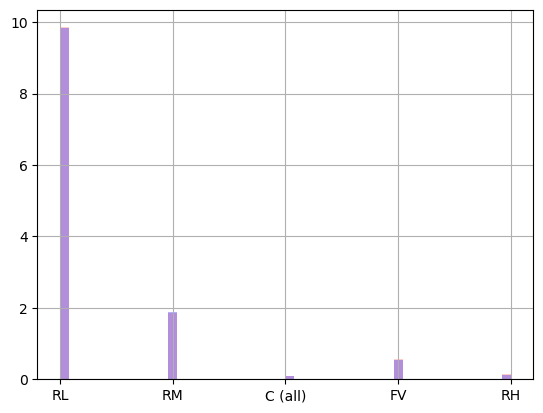

In [265]:
dataHP['MSZoning'].hist(bins=50, density=True, color='red', alpha= 0.2)
data_HP_noNAN['MSZoning'].hist(bins=50, density=True, color='blue', alpha=0.3)
plt.show()

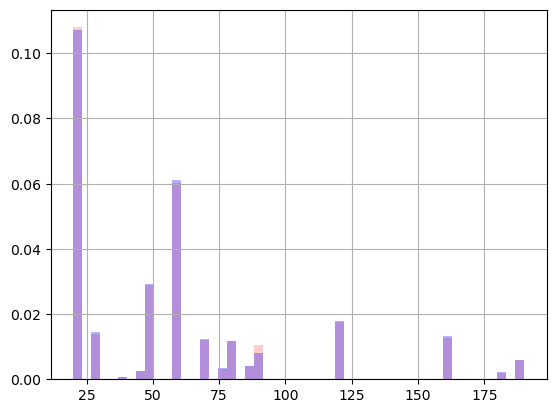

In [266]:
dataHP['MSSubClass'].hist(bins=50, density=True, color='red', alpha= 0.2)
data_HP_noNAN['MSSubClass'].hist(bins=50, density=True, color='blue', alpha=0.3)
plt.show()

In [267]:
dataTitanic=pd.read_csv('titanic.csv')
dataTitanica=dataTitanic[['Survived','Age', 'Fare']]
dataTitanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [268]:
dataTitanic.isnull().mean()

PassengerId    0.000000
Survived       0.000000
Pclass         0.000000
Name           0.000000
Sex            0.000000
Age            0.198653
SibSp          0.000000
Parch          0.000000
Ticket         0.000000
Fare           0.000000
Cabin          0.771044
Embarked       0.002245
dtype: float64

In [269]:
media=dataTitanic['Age'].mean()
mediana=dataTitanic['Age'].median()
print(f"Media:{media}")
print(f"Median:{mediana}")

Media:29.69911764705882
Median:28.0


In [270]:
dataTitanic['Age_Mean']=np.round(dataTitanic['Age'].fillna(media))
dataTitanic['Age_Median'] = np.round(dataTitanic['Age'].fillna(mediana))

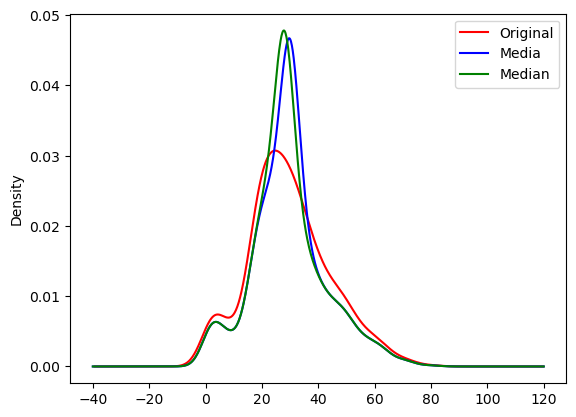

In [271]:
fig=plt.figure()
ax=fig.add_subplot(111)

dataTitanic['Age'].plot.density(color='red',label='Original')
dataTitanic['Age_Mean'].plot.density(color='blue',label='Media')
dataTitanic['Age_Median'].plot.density(color='green',label='Median')
plt.show
ax.legend()

<function matplotlib.pyplot.show(close=None, block=None)>

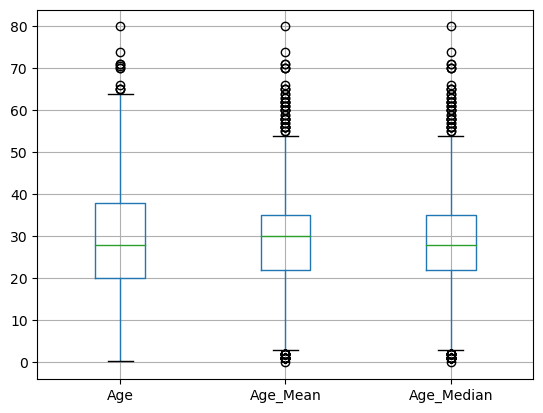

In [272]:
dataTitanic[['Age','Age_Mean','Age_Median']].boxplot()
plt.show

In [273]:
dataset_cat_missing=dataHP[['BsmtQual','FireplaceQu','SalePrice']]
dataset_cat_missing.head()

,BsmtQual,FireplaceQu,SalePrice
0,Gd,NaN,208500
1,Gd,TA,181500
2,Gd,TA,223500
3,TA,Gd,140000
4,Gd,TA,250000


In [274]:
dataset_cat_missing.isnull().mean()

BsmtQual       0.025342
FireplaceQu    0.472603
SalePrice      0.000000
dtype: float64

In [275]:
dataset_cat_missing['BsmtQual'].value_counts()

TA    649
Gd    618
Ex    121
Fa     35
Name: BsmtQual, dtype: int64

In [276]:
dataset_cat_missing['BsmtQual'].value_counts()/len(dataset_cat_missing)

TA    0.444521
Gd    0.423288
Ex    0.082877
Fa    0.023973
Name: BsmtQual, dtype: float64

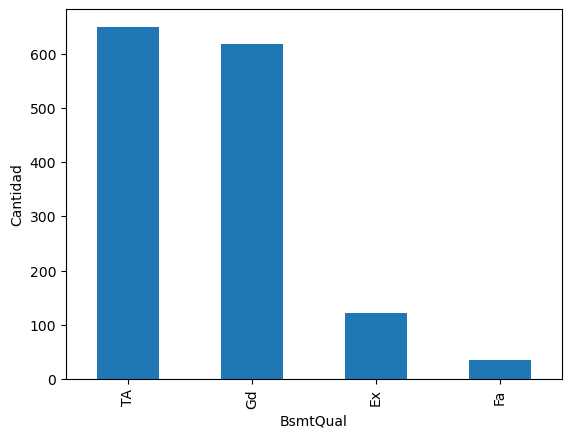

In [277]:
dataset_cat_missing['BsmtQual'].value_counts().plot.bar()
plt.ylabel("Cantidad")
plt.xlabel("BsmtQual")
plt.show()

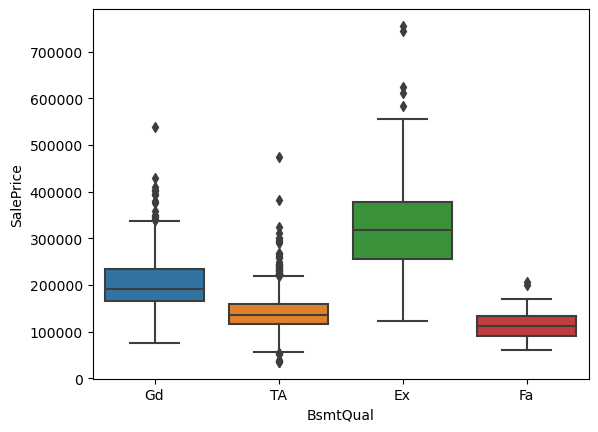

In [278]:
import seaborn as sns
sns.boxplot(x=dataset_cat_missing['BsmtQual'],y=dataset_cat_missing['SalePrice'])
plt.show()

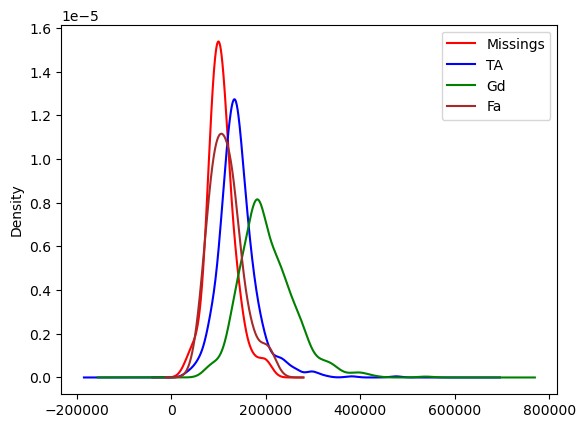

In [279]:
fig=plt.figure()
ax=fig.add_subplot(111)

dataset_cat_missing[dataset_cat_missing['BsmtQual'].isnull()]['SalePrice'].plot(kind="kde",color="red",label="Missings")
dataset_cat_missing[dataset_cat_missing['BsmtQual']=='TA']['SalePrice'].plot(kind="kde",color="blue",label="TA")
dataset_cat_missing[dataset_cat_missing['BsmtQual']=='Gd']['SalePrice'].plot(kind="kde",color="green",label="Gd")
dataset_cat_missing[dataset_cat_missing['BsmtQual']=='Fa']['SalePrice'].plot(kind="kde",color="Brown",label="Fa")
ax.legend()
plt.show()


In [280]:
dataset_cat_missing['FireplaceQu'].value_counts()

Gd    380
TA    313
Fa     33
Ex     24
Po     20
Name: FireplaceQu, dtype: int64

In [281]:
dataset_cat_missing['FireplaceQu'].value_counts()/len(dataset_cat_missing)

Gd    0.260274
TA    0.214384
Fa    0.022603
Ex    0.016438
Po    0.013699
Name: FireplaceQu, dtype: float64

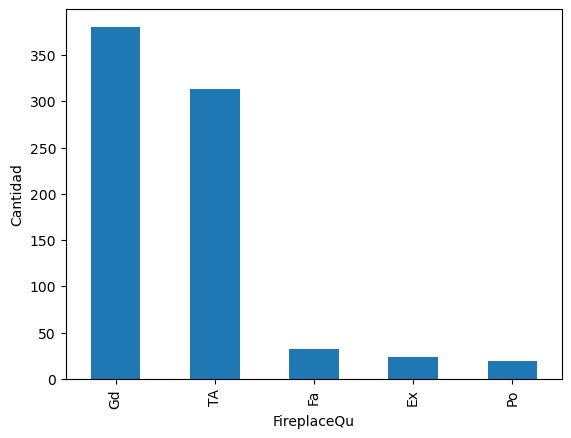

In [282]:
dataset_cat_missing['FireplaceQu'].value_counts().plot.bar()
plt.ylabel("Cantidad")
plt.xlabel("FireplaceQu")
plt.show()

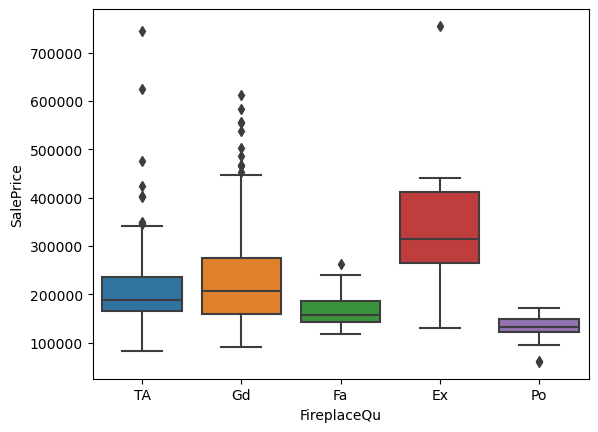

In [283]:
import seaborn as sns
sns.boxplot(x=dataset_cat_missing['FireplaceQu'],y=dataset_cat_missing['SalePrice'])
plt.show()

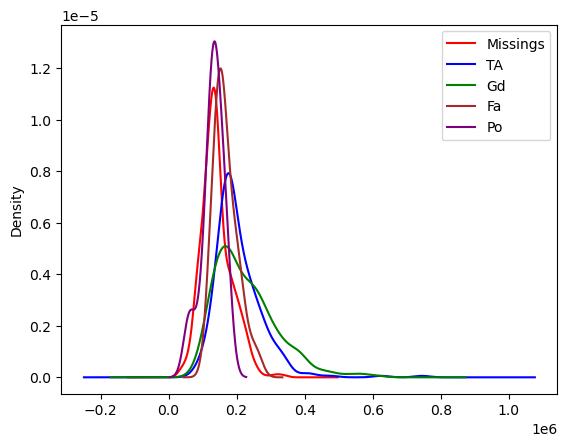

In [284]:
fig=plt.figure()
ax=fig.add_subplot(111)

dataset_cat_missing[dataset_cat_missing['FireplaceQu'].isnull()]['SalePrice'].plot(kind="kde",color="red",label="Missings")
dataset_cat_missing[dataset_cat_missing['FireplaceQu']=='TA']['SalePrice'].plot(kind="kde",color="blue",label="TA")
dataset_cat_missing[dataset_cat_missing['FireplaceQu']=='Gd']['SalePrice'].plot(kind="kde",color="green",label="Gd")
dataset_cat_missing[dataset_cat_missing['FireplaceQu']=='Fa']['SalePrice'].plot(kind="kde",color="brown",label="Fa")
dataset_cat_missing[dataset_cat_missing['FireplaceQu']=='Po']['SalePrice'].plot(kind="kde",color="purple",label="Po")
ax.legend()
plt.show()


In [285]:
###Imputación de datos categoricos 
dataset_cat_missing['BsmtQual'].fillna('Fa',inplace=True)

C:\Users\cindy\AppData\Local\Temp\ipykernel_59404\2389707929.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset_cat_missing['BsmtQual'].fillna('Fa',inplace=True)


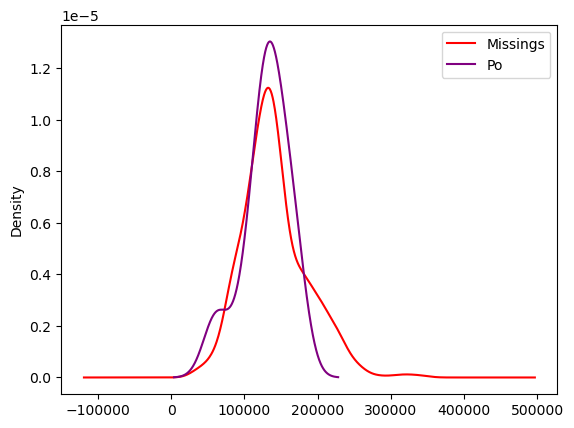

In [286]:
fig=plt.figure()
ax=fig.add_subplot(111)

dataset_cat_missing[dataset_cat_missing['FireplaceQu'].isnull()]['SalePrice'].plot(kind="kde",color="red",label="Missings")
dataset_cat_missing[dataset_cat_missing['FireplaceQu']=='Po']['SalePrice'].plot(kind="kde",color="purple",label="Po")
ax.legend()
plt.show()

In [287]:
###Imputación de datos categoricos 
dataset_cat_missing['FireplaceQu'].fillna('Po',inplace=True)

C:\Users\cindy\AppData\Local\Temp\ipykernel_59404\1424755496.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset_cat_missing['FireplaceQu'].fillna('Po',inplace=True)


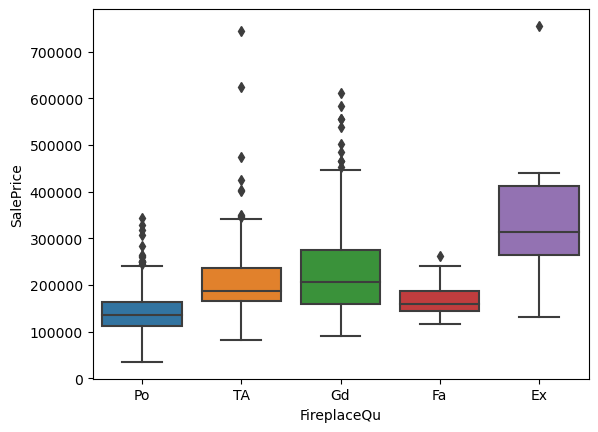

In [288]:
import seaborn as sns
sns.boxplot(x=dataset_cat_missing['FireplaceQu'],y=dataset_cat_missing['SalePrice'])
plt.show()

In [289]:
###Codificación de Variables Categóricas

In [290]:
def getCategoryVars(dataset):
    cat_colnames=[]
    colnames=dataset.columns
    for col in colnames:
        if(dataset[col].dtype=='object'):
            cat_colnames.append(col)
    return cat_colnames

In [291]:
cat_cols=getCategoryVars(dataHP)
cat_cols

['MSZoning',
 'Street',
 'Alley',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 'KitchenQual',
 'Functional',
 'FireplaceQu',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'PoolQC',
 'Fence',
 'MiscFeature',
 'SaleType',
 'SaleCondition']

In [292]:
cat_cols.append('SalePrice')

In [293]:
dataset_categories=dataHP[cat_cols]
dataset_categories.head()

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,...,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition,SalePrice
0,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal,208500
1,RL,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,...,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal,181500
2,RL,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal,223500
3,RL,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,...,Unf,TA,TA,Y,NaN,NaN,NaN,WD,Abnorml,140000
4,RL,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,...,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal,250000


In [294]:
dataset_categories['MSZoning'].value_counts()

RL         1151
RM          218
FV           65
RH           16
C (all)      10
Name: MSZoning, dtype: int64

In [295]:
dataset_categories.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 44 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   MSZoning       1460 non-null   object
 1   Street         1460 non-null   object
 2   Alley          91 non-null     object
 3   LotShape       1460 non-null   object
 4   LandContour    1460 non-null   object
 5   Utilities      1460 non-null   object
 6   LotConfig      1460 non-null   object
 7   LandSlope      1460 non-null   object
 8   Neighborhood   1460 non-null   object
 9   Condition1     1460 non-null   object
 10  Condition2     1460 non-null   object
 11  BldgType       1460 non-null   object
 12  HouseStyle     1460 non-null   object
 13  RoofStyle      1460 non-null   object
 14  RoofMatl       1460 non-null   object
 15  Exterior1st    1460 non-null   object
 16  Exterior2nd    1460 non-null   object
 17  MasVnrType     1452 non-null   object
 18  ExterQual      1460 non-null

In [296]:
dfTemp=pd.get_dummies(dataset_categories)
dfTemp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Columns: 253 entries, SalePrice to SaleCondition_Partial
dtypes: int64(1), uint8(252)
memory usage: 370.8 KB


In [297]:
pd.get_dummies(dataset_categories['MSZoning'])

,C (all),FV,RH,RL,RM
0,0,0,0,1,0
1,0,0,0,1,0
2,0,0,0,1,0
3,0,0,0,1,0
4,0,0,0,1,0
...,...,...,...,...,...
1455,0,0,0,1,0
1456,0,0,0,1,0
1457,0,0,0,1,0
1458,0,0,0,1,0


In [298]:
dataset_categories.shape

(1460, 44)

In [299]:
dfTemp=pd.get_dummies(dataset_categories)
dfTemp.shape

(1460, 253)

In [300]:
###Frequency Encoding (Frecuencia)

In [301]:
dataset_categories['KitchenQual'].value_counts().sort_values(ascending=False)

TA    735
Gd    586
Ex    100
Fa     39
Name: KitchenQual, dtype: int64

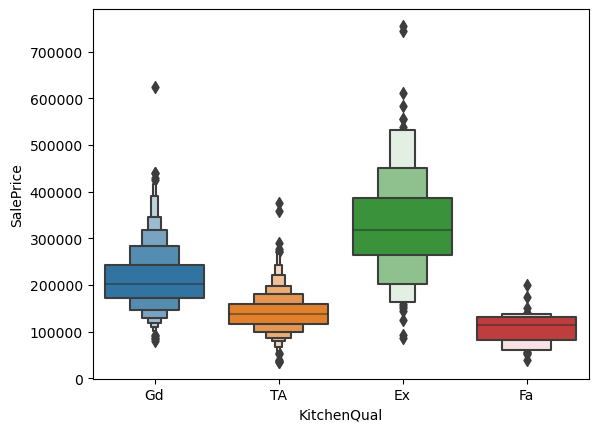

In [302]:
sns.boxenplot(x=dataset_categories['KitchenQual'],y=dataset_categories['SalePrice'])
plt.show()

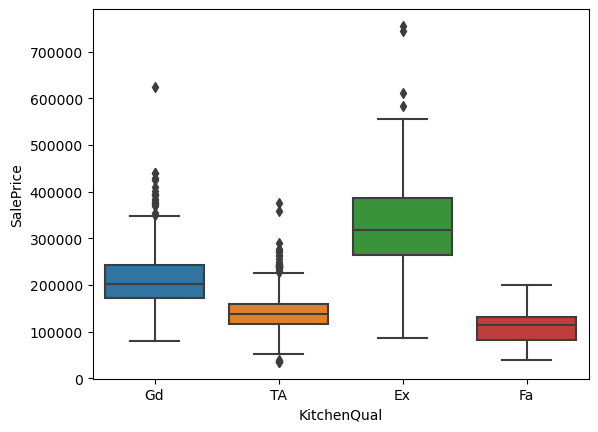

In [303]:
sns.boxplot(x=dataset_categories['KitchenQual'],y=dataset_categories['SalePrice'])
plt.show()

In [304]:
KitchenQual_freq_mapper=(dataset_categories['KitchenQual'].value_counts().sort_values(ascending=False)).to_dict()
KitchenQual_freq_mapper

{'TA': 735, 'Gd': 586, 'Ex': 100, 'Fa': 39}

In [305]:
dataset_categories['KitchenQual_code']=dataset_categories['KitchenQual'].map(KitchenQual_freq_mapper)
dataset_categories[['KitchenQual','KitchenQual_code']]

C:\Users\cindy\AppData\Local\Temp\ipykernel_59404\2520136808.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset_categories['KitchenQual_code']=dataset_categories['KitchenQual'].map(KitchenQual_freq_mapper)


,KitchenQual,KitchenQual_code
0,Gd,586
1,TA,735
2,Gd,586
3,Gd,586
4,Gd,586
...,...,...
1455,TA,735
1456,TA,735
1457,Gd,586
1458,Gd,586


In [379]:
dataset=dataHP
continuas=[]
discretas=[]
for col in dataset.columns:
    if((dataset[col].dtype=='int64')or(dataset[col].dtype=='float64')):
        print(col)
        

Id
MSSubClass
LotFrontage
LotArea
OverallQual
OverallCond
YearBuilt
YearRemodAdd
MasVnrArea
BsmtFinSF1
BsmtFinSF2
BsmtUnfSF
TotalBsmtSF
1stFlrSF
2ndFlrSF
LowQualFinSF
GrLivArea
BsmtFullBath
BsmtHalfBath
FullBath
HalfBath
BedroomAbvGr
KitchenAbvGr
TotRmsAbvGrd
Fireplaces
GarageYrBlt
GarageCars
GarageArea
WoodDeckSF
OpenPorchSF
EnclosedPorch
3SsnPorch
ScreenPorch
PoolArea
MiscVal
MoSold
YrSold
SalePrice
GrLivArea_log
GrLivArea_inv
GrLivArea_cuad
GrLivArea_boxcox
GrLivArea_yeoJonhson


In [307]:
dataset.dtypes

Id                 int64
MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
                  ...   
MoSold             int64
YrSold             int64
SaleType          object
SaleCondition     object
SalePrice          int64
Length: 81, dtype: object

In [308]:
dataset=dataHP

def getColumnTypes(dataset):
###Descripción: Esta función extrae el tipo de dominio de las columnas de un dataset.
###Entradas: Pandas Dataframe
###Salida: Tupla con arreglo que contiene nombres de las columnas
    continuas=[]
    discretas=[]
    categoricas=[]
    for col in dataset.columns:
        if((dataset[col].dtype=='int64')or(dataset[col].dtype=='float64')):
            if(len(dataset[col].unique())>30):
                continuas.append(col)
            else:
                discretas.append(col)
        else:
            categoricas.append(col)
    return continuas, discretas, categoricas

In [309]:
continuas, discretas, categoricas=getColumnTypes(dataHP)
print(continuas)
print(discretas)
print(categoricas)

['Id', 'LotFrontage', 'LotArea', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'GrLivArea', 'GarageYrBlt', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', 'ScreenPorch', 'SalePrice']
['MSSubClass', 'OverallQual', 'OverallCond', 'LowQualFinSF', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageCars', '3SsnPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold']
['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'Gar

In [310]:
import scipy.stats as stats

In [384]:

dataset=dataHP
col ='BsmtQua'
def plotDistBoxQQ(dataset,col)

plt.figure(figsize=(20,6))

plt.subplot(1,3,1)
sns.distplot(dataset[col],bins=30)
plt.title("Histograma y Densidad")

plt.subplot(1,3,2)
sns.boxplot(y=dataset[col])
plt.title("Boxplot")


plt.subplot(1,3,3)
stats.probplot(dataset[col],dist="norm",plot=plt)
plt.title("Q-Q Plot")

SyntaxError: invalid syntax (2640876698.py, line 3)

C:\Users\cindy\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Q-Q Plot')

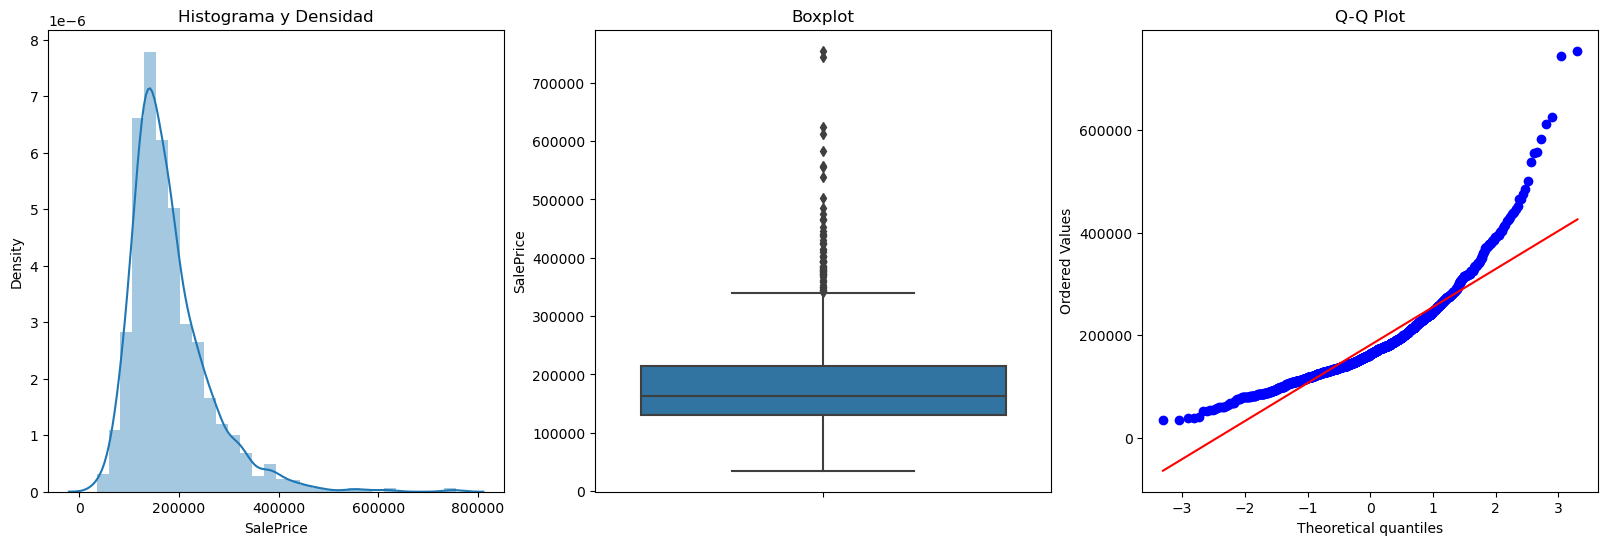

In [312]:


dataset=dataHP
col ='SalePrice'

plt.figure(figsize=(20,6))

plt.subplot(1,3,1)
sns.distplot(dataset[col],bins=30)
plt.title("Histograma y Densidad")

plt.subplot(1,3,2)
sns.boxplot(y=dataset[col])
plt.title("Boxplot")


plt.subplot(1,3,3)
stats.probplot(dataset[col],dist="norm",plot=plt)
plt.title("Q-Q Plot")

In [313]:
def plotDistBoxQQ(dataset,col):

###descripcion: Muestra las graficas de Distribucion, Boxplot y QQ-Plot para detectar Outliers imput:dataset-> pandas datagrame, col ->string con nombre de columna output: visualización de plots.

    plt.figure(figsize=(20,6))
    plt.subplot(1,3,1)
    sns.distplot(dataset[col],bins=30)
    plt.title("Histograma y Densidad")

    plt.subplot(1,3,2)
    sns.boxplot(y=dataset[col])
    plt.title("Boxplot")


    plt.subplot(1,3,3)
    stats.probplot(dataset[col],dist="norm",plot=plt)
    plt.title("Q-Q Plot")

C:\Users\cindy\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\cindy\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\cindy\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-lev

ValueError: could not convert string to float: 'RL'

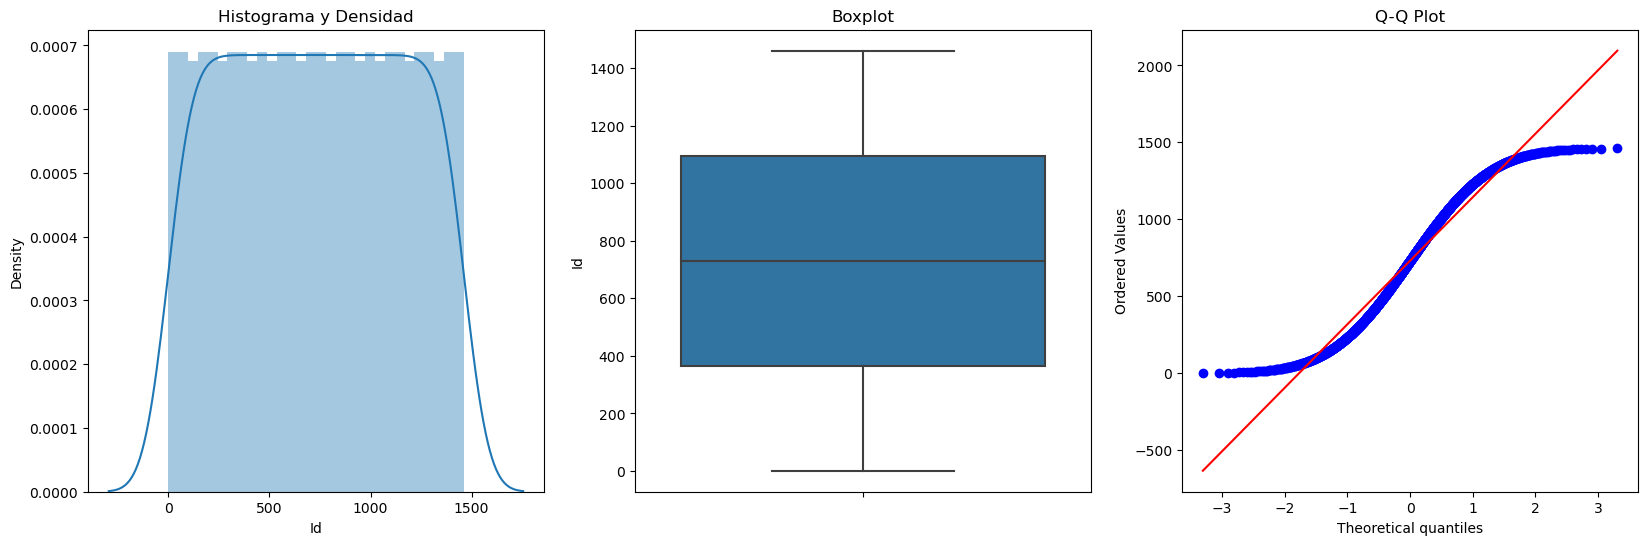

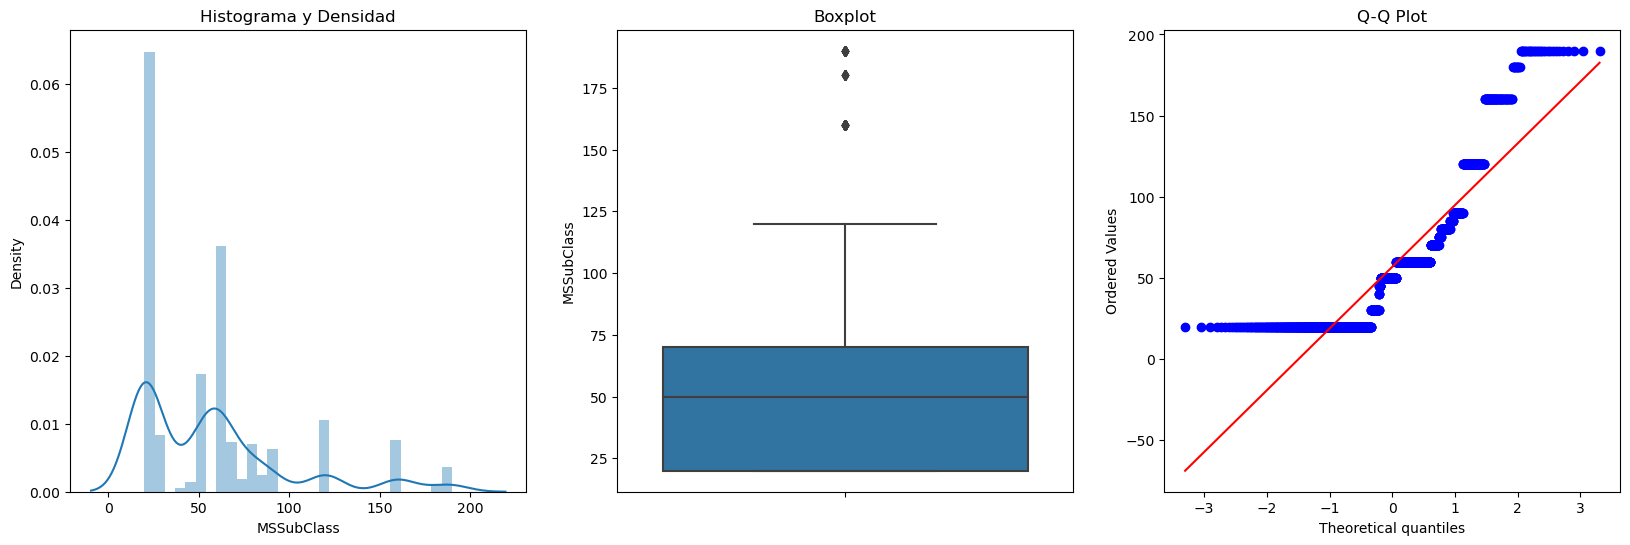

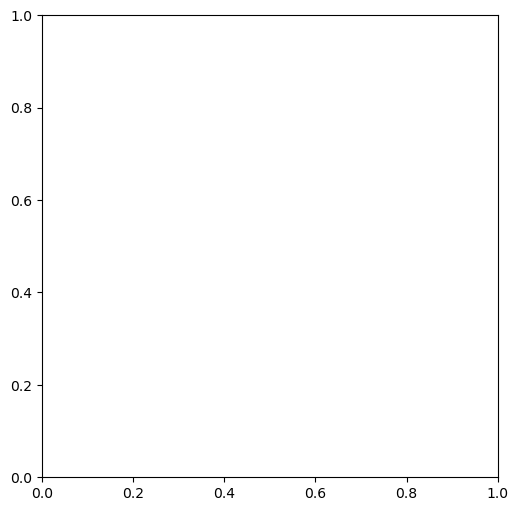

In [314]:
for col in dataHP.columns:
    plotDistBoxQQ(dataHP,col)
    

In [387]:
for col in continuas:
    plotDistBoxQQ(dataHP,col)
    

In [388]:
for col in continuas:
    print(f"------------{col}----------")
    plotDistBoxQQ(dataHP,col)

In [389]:
for col in discretas:
    plotDistBoxQQ(dataHP,col)

In [390]:
for col in discretas:
    print(f"------------{col}----------")
    plotDistBoxQQ(dataHP,col)
    

In [317]:
dataset= dataHP
col= 'LotArea'


IQR=dataset[col].quantile(0.75)-dataset[col].quantile(0.25)
LI=dataset[col].quantile(0.25)-(IQR*1.75)
LS=dataset[col].quantile(0.75)+(IQR*1.75)

print(LI)
print(LS)

469.5
18685.5


In [373]:
###Descripción: Calcula los limites superiores e inferiores para detección de outliers. Input:dataset->pandas dataframe, col ->string nombre de columna Output: tuplade floats con los limites superiores e inferiores


In [392]:
def detectOutliersLimits(dataset,col):
    IQR=dataset[col].quantile(0.75)-dataset[col].quantile(0.25)
    LI= dataset[col].quantile(0.25)-(IQR*1.50)
    LS= dataset[col].quantile(0.75)+(IQR*1.50)

    return LI,LS


In [393]:
LI, LS= detectOutliersLimits(dataHP,'SalePrice')
LI, LS

(3937.5, 340037.5)

In [321]:
### Capping

C:\Users\cindy\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


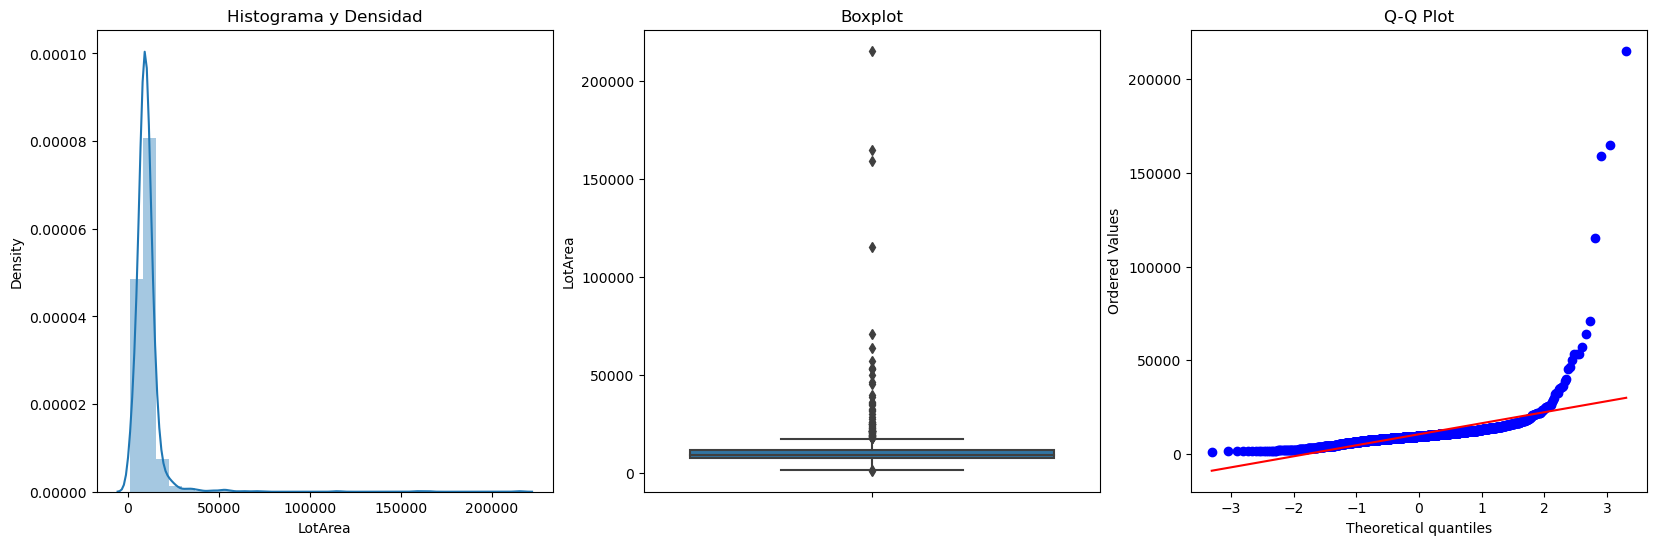

In [322]:
plotDistBoxQQ(dataHP,'LotArea')

In [323]:
LI, LS= detectOutliersLimits(dataHP,'LotArea')
dataHP['LotArea']=np.where(dataHP['LotArea']> LS,LS,
                          np.where(dataHP['LotArea']<LI, LI,dataHP['LotArea']))

C:\Users\cindy\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


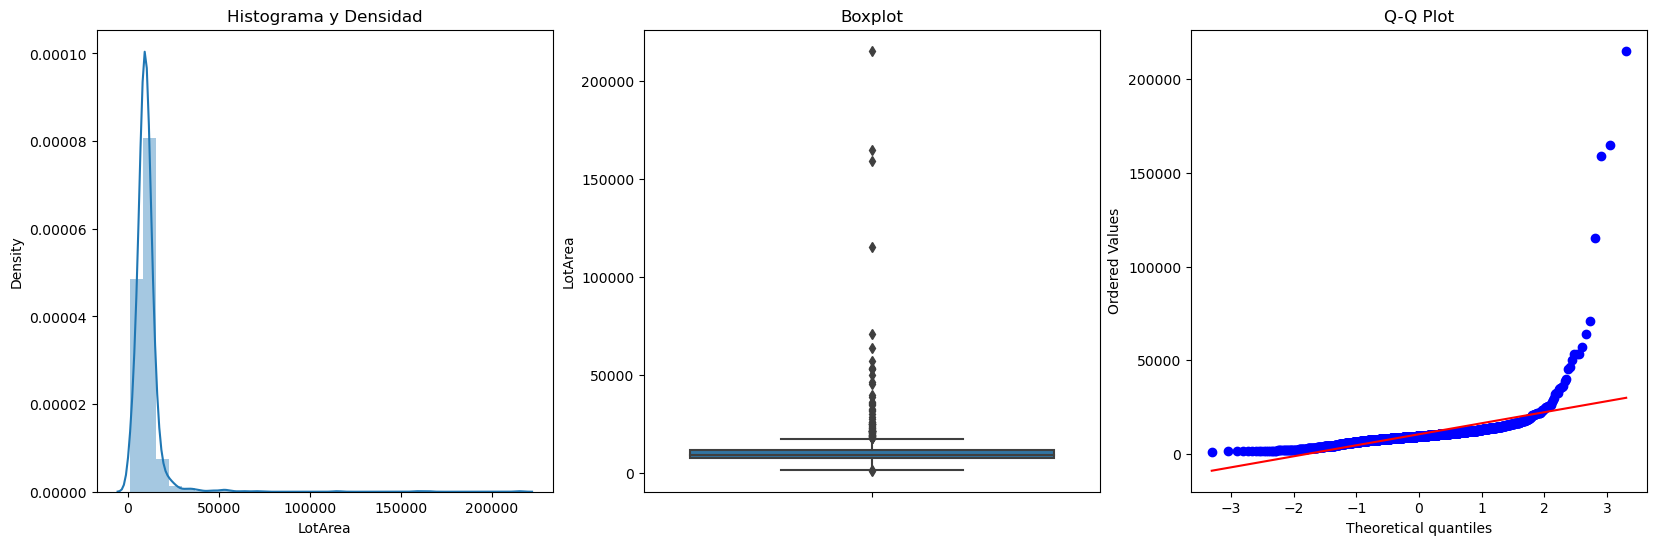

In [372]:
plotDistBoxQQ(dataHP,'LotArea')

In [377]:
#FUNCION PARA OUTLIERS
def outl(dataser,col):
    IQR=dataset[col].quantils(0.75)-dataset[col].quantile(0.25)
    LI=dataset[col].quantils(0.25)-()
    
    dataset[col]=np.where(dataset[col]> LS, LS)

In [325]:
x=np.array([500000,1500000,2000000,2500000])
y=np.log(x)

In [326]:
y

array([13.12236338, 14.22097567, 14.50865774, 14.73180129])

In [147]:
## cuando quieres regresar el valor normal  np.exp(y)

array([ 500000., 1500000., 2000000., 2500000.])

In [327]:
import scipy.stats as stats

In [328]:
dataHP=pd.read_csv('train_HP.csv')

In [329]:
### esto de manera individual     dataset=dataHP
### col='GrLivArea'
### de plot_density_qq(dataset,col):
    ###Esta funcion muestra la grafica de densidad y el plot QQ para verificar normalidad
    ###plt.figure(figsize=(15,6))
    ###plt.subplot(1,2,1)
    ###dataset[col].hist(bins=30)
    ###plt.subplot(1,2,2)
    ###stats.probplot(dataset[col], dist='norm', plot=plt)
    ###plt.show()


In [330]:
def plot_density_qq(dataset,col):
 ###Esta funcion muestra la grafica de densidad y el plot QQ para verificar normalidad
    plt.figure(figsize=(15,6))
    plt.subplot(1,2,1)
    dataset[col].hist(bins=30)
    plt.subplot(1,2,2)
    stats.probplot(dataset[col], dist='norm', plot=plt)
    plt.show()


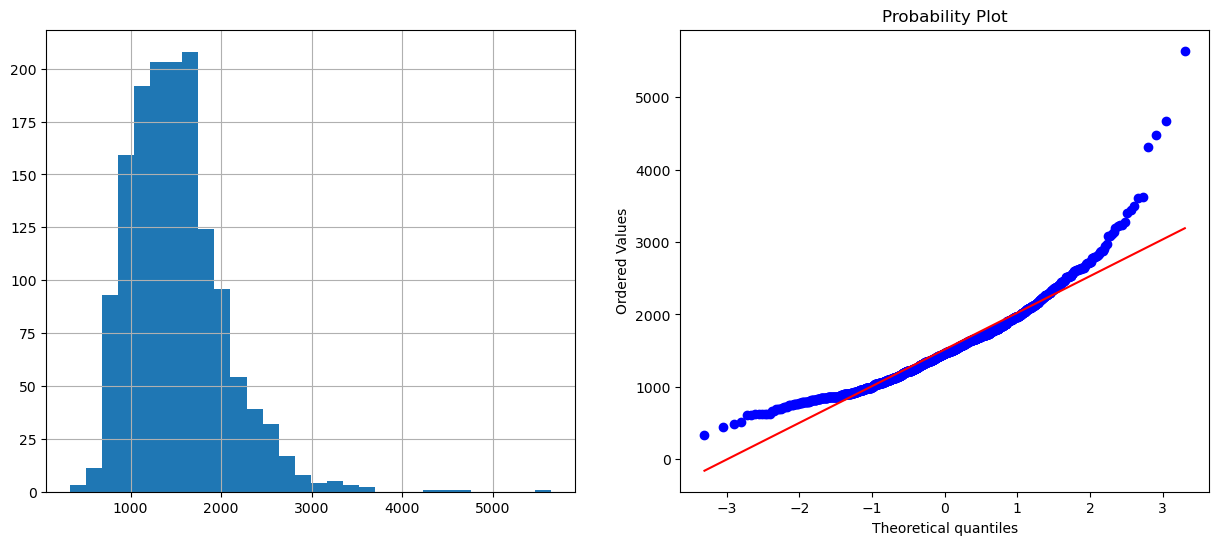

In [331]:
plot_density_qq(dataHP,'GrLivArea')

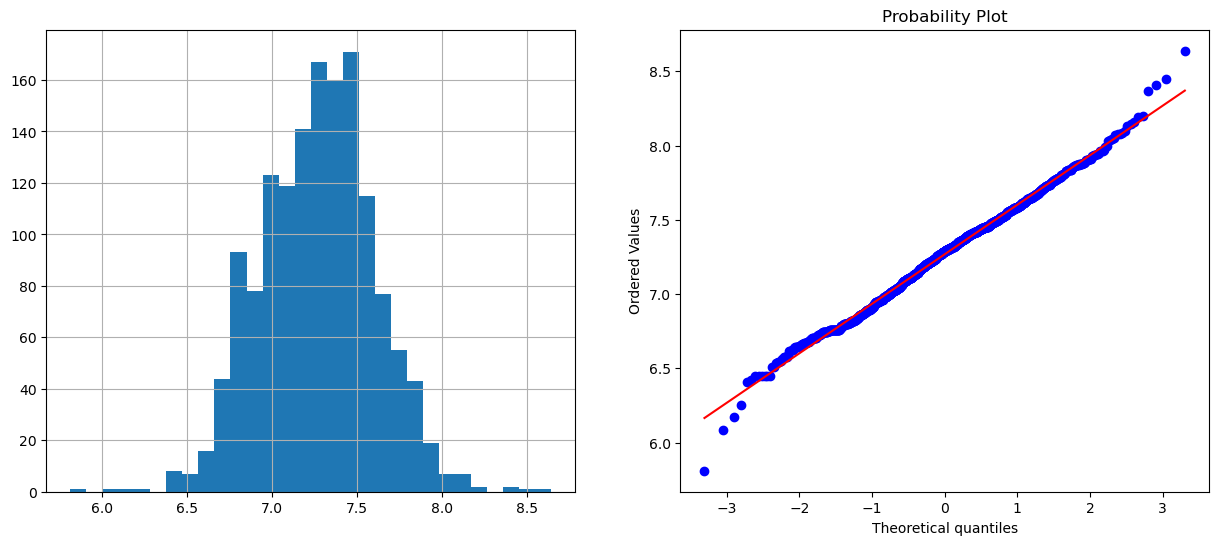

In [332]:
dataHP['GrLivArea_log']=np.log(dataHP['GrLivArea'])
plot_density_qq(dataHP,'GrLivArea_log')

In [391]:
for col in continuas:

     asimetria = round(dataHP[col].skew(), 4)
     kurtosis = round(dataHP[col].kurt(), 4)

     #validación de asimetría

     if((asimetria <= 0.1) and (asimetria >= -0.1)):
          etiqueta_asimetria = True
     else:
          etiqueta_asimetria = False


     #validación de curtosis

     if((kurtosis <= 3.2) and (kurtosis >= 2.8)):
          etiqueta_curtosis = True
     else:
          etiqueta_curtosis = False

            
     #conclusión de normalidad

     if(etiqueta_asimetria and etiqueta_curtosis):
          etiqueta = 'Normal'
     else:
          etiqueta = "No es Normal"
     print(f"{col} - Asimetría: {asimetria}, Curtosis: {kurtosis} - {etiqueta}")

In [334]:
shapiro_test=stats.shapiro(dataHP['GrLivArea'])
shapiro_test

ShapiroResult(statistic=0.927983283996582, pvalue=6.59922021670945e-26)

In [335]:
shapiro_test=stats.shapiro(dataHP['GrLivArea'])
shapiro_test[1]

6.59922021670945e-26

In [338]:
shapiro_test=stats.shapiro(dataHP['GrLivArea_log'])
if(shapiro_test[1]<0.05):
    print("No es Normal")
else:
    Print("Es Normal")
shapiro_test

No es Normal


ShapiroResult(statistic=0.9960911273956299, pvalue=0.000858238257933408)

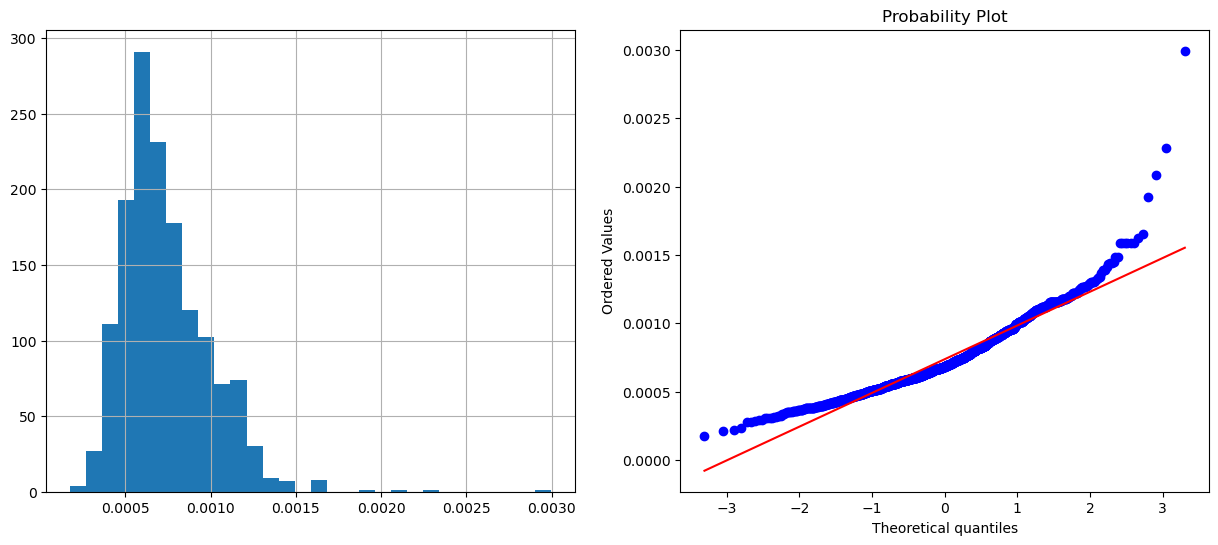

In [341]:
dataHP['GrLivArea_inv']=(1/dataHP['GrLivArea'])
plot_density_qq(dataHP,'GrLivArea_inv')

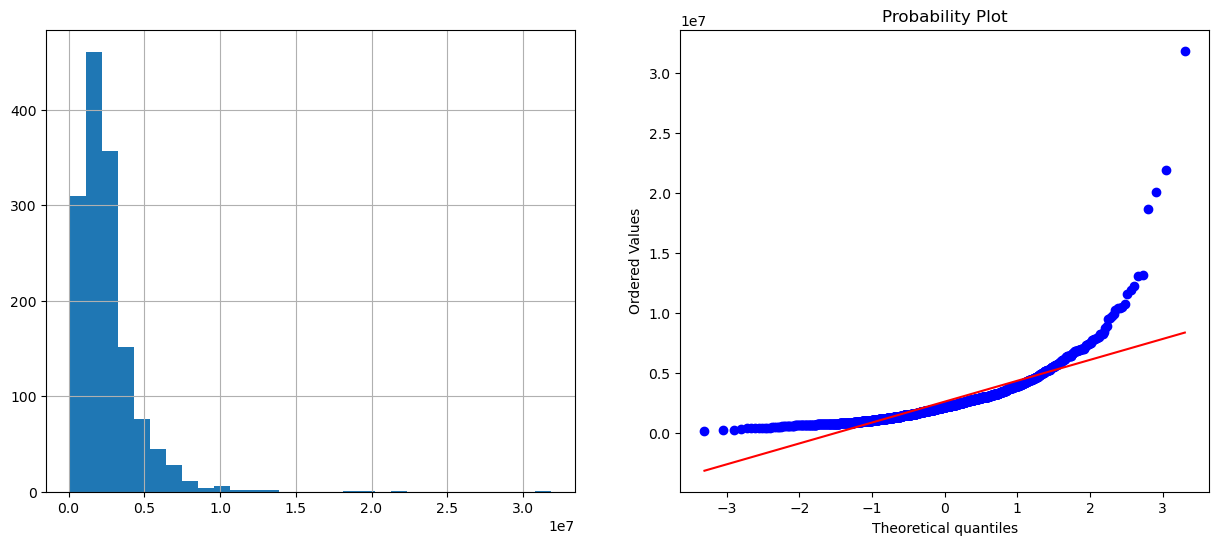

In [346]:
dataHP['GrLivArea_cuad']=(dataHP['GrLivArea']**2)
plot_density_qq(dataHP,'GrLivArea_cuad')

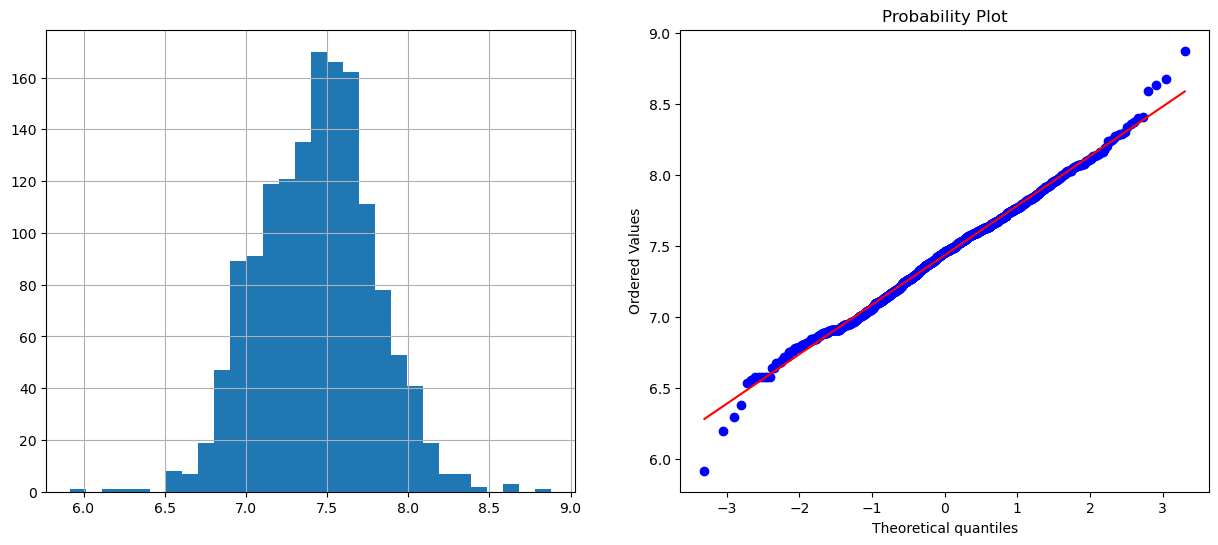

In [347]:
dataHP['GrLivArea_boxcox'],_=stats.boxcox(dataHP['GrLivArea'])
plot_density_qq(dataHP,'GrLivArea_boxcox')

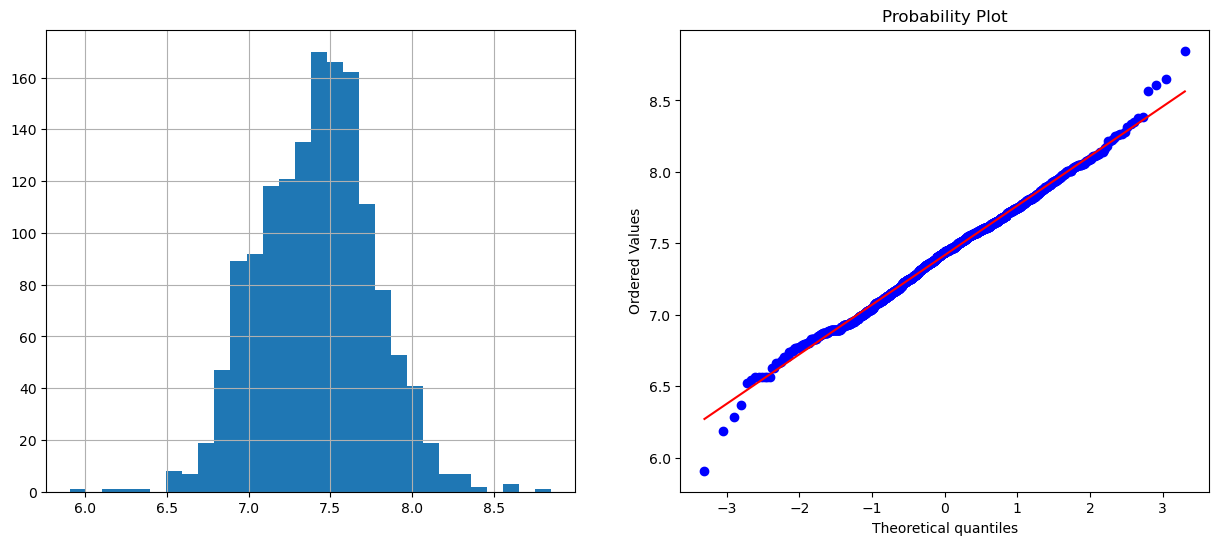

In [350]:
dataHP['GrLivArea_yeoJonhson'],_=stats.yeojohnson(dataHP['GrLivArea'])
plot_density_qq(dataHP,'GrLivArea_yeoJonhson')

In [356]:
###3.2 Feature Scaling

In [357]:
dataHP.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,PoolArea,MiscVal,MoSold,YrSold,SalePrice,GrLivArea_log,GrLivArea_inv,GrLivArea_cuad,GrLivArea_boxcox,GrLivArea_yeoJonhson
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1.460000e+03,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,2.758904,43.489041,6.321918,2007.815753,180921.195890,7.267774,0.000738,2.572571e+06,7.437229,7.417149
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,40.177307,496.123024,2.703626,1.328095,79442.502883,0.333550,0.000256,2.064173e+06,0.349189,0.346996
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,2006.000000,34900.000000,5.811141,0.000177,1.115560e+05,5.918910,5.908775
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,5.000000,2007.000000,129975.000000,7.029530,0.000563,1.275771e+06,7.187634,7.169113
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,0.000000,6.000000,2008.000000,163000.000000,7.288928,0.000683,2.143296e+06,7.459009,7.438796
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,0.000000,0.000000,8.000000,2009.000000,214000.000000,7.482541,0.000885,3.156842e+06,7.661851,7.640370
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,738.000000,15500.000000,12.000000,2010.000000,755000.000000,8.637994,0.002994,3.183216e+07,8.877544,8.848186


In [362]:
from sklearn.preprocessing import StandardScaler

In [363]:
dataHP_temp=dataHP.copy()[continuas]

In [368]:
scaler=StandardScaler()
scaler.fit(dataHP_temp) #calculamos información interna (parámetros) para transformaciones posteriores.

dataHP_scaled=scaler.transform(dataHP_temp)
dataHP_scaled=pd.DataFrame(dataHP_scaled,columns=dataHP_temp.columns)


In [369]:
dataHP_scaled.describe()

,Id,LotFrontage,LotArea,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,GrLivArea,GarageYrBlt,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,ScreenPorch,SalePrice
count,1.460000e+03,1.201000e+03,1.460000e+03,1.460000e+03,1.460000e+03,1.452000e+03,1.460000e+03,1.460000e+03,1.460000e+03,1.460000e+03,1.460000e+03,1.460000e+03,1.460000e+03,1.379000e+03,1.460000e+03,1.460000e+03,1.460000e+03,1.460000e+03,1.460000e+03,1.460000e+03
mean,8.243026e-17,-2.846969e-16,-4.202783e-17,1.032983e-15,4.518912e-15,2.561465e-16,1.505645e-17,1.653168e-16,-7.376139e-17,2.063038e-16,7.686013e-17,-3.269835e-17,-1.446332e-16,4.070388e-15,-2.022735e-17,2.190029e-16,3.357284e-17,1.379034e-16,1.199193e-16,1.180182e-16
std,1.000343e+00,1.000417e+00,1.000343e+00,1.000343e+00,1.000343e+00,1.000345e+00,1.000343e+00,1.000343e+00,1.000343e+00,1.000343e+00,1.000343e+00,1.000343e+00,1.000343e+00,1.000363e+00,1.000343e+00,1.000343e+00,1.000343e+00,1.000343e+00,1.000343e+00,1.000343e+00
min,-1.730865e+00,-2.020626e+00,-9.237292e-01,-3.287824e+00,-1.689368e+00,-5.728346e-01,-9.730182e-01,-2.886528e-01,-1.284176e+00,-2.411167e+00,-2.144172e+00,-7.951632e-01,-2.249120e+00,-3.180863e+00,-2.212963e+00,-7.521758e-01,-7.044833e-01,-3.593249e-01,-2.702084e-01,-1.838704e+00
25%,-8.654324e-01,-4.552059e-01,-2.969908e-01,-5.719226e-01,-8.656586e-01,-5.728346e-01,-9.730182e-01,-2.886528e-01,-7.793259e-01,-5.966855e-01,-7.261556e-01,-7.951632e-01,-7.347485e-01,-7.093038e-01,-6.479160e-01,-7.521758e-01,-7.044833e-01,-3.593249e-01,-2.702084e-01,-6.415162e-01
50%,0.000000e+00,-4.325330e-02,-1.040633e-01,5.737148e-02,4.425864e-01,-5.728346e-01,-1.319022e-01,-2.886528e-01,-2.031633e-01,-1.503334e-01,-1.956933e-01,-7.951632e-01,-9.797004e-02,6.052631e-02,3.284429e-02,-7.521758e-01,-3.270298e-01,-3.593249e-01,-2.702084e-01,-2.256643e-01
75%,8.654324e-01,4.098945e-01,1.087080e-01,9.516316e-01,9.271216e-01,3.442730e-01,5.891327e-01,-2.886528e-01,5.450557e-01,5.491227e-01,5.915905e-01,8.731117e-01,4.974036e-01,9.519085e-01,4.820057e-01,5.886506e-01,3.221901e-01,-3.593249e-01,-2.702084e-01,4.165294e-01
max,1.730865e+00,1.000839e+01,2.051827e+01,1.282839e+00,1.217843e+00,8.266757e+00,1.140575e+01,8.851638e+00,4.004295e+00,1.152095e+01,9.132681e+00,3.936963e+00,7.855574e+00,1.276047e+00,4.421526e+00,6.087635e+00,7.554198e+00,8.675309e+00,8.341462e+00,7.228819e+00


In [370]:
round(dataHP_scaled.describe(),2)

,Id,LotFrontage,LotArea,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,GrLivArea,GarageYrBlt,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,ScreenPorch,SalePrice
count,1460.00,1201.00,1460.00,1460.00,1460.00,1452.00,1460.00,1460.00,1460.00,1460.00,1460.00,1460.00,1460.00,1379.00,1460.00,1460.00,1460.00,1460.00,1460.00,1460.00
mean,0.00,-0.00,-0.00,0.00,0.00,0.00,0.00,0.00,-0.00,0.00,0.00,-0.00,-0.00,0.00,-0.00,0.00,0.00,0.00,0.00,0.00
std,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00
min,-1.73,-2.02,-0.92,-3.29,-1.69,-0.57,-0.97,-0.29,-1.28,-2.41,-2.14,-0.80,-2.25,-3.18,-2.21,-0.75,-0.70,-0.36,-0.27,-1.84
25%,-0.87,-0.46,-0.30,-0.57,-0.87,-0.57,-0.97,-0.29,-0.78,-0.60,-0.73,-0.80,-0.73,-0.71,-0.65,-0.75,-0.70,-0.36,-0.27,-0.64
50%,0.00,-0.04,-0.10,0.06,0.44,-0.57,-0.13,-0.29,-0.20,-0.15,-0.20,-0.80,-0.10,0.06,0.03,-0.75,-0.33,-0.36,-0.27,-0.23
75%,0.87,0.41,0.11,0.95,0.93,0.34,0.59,-0.29,0.55,0.55,0.59,0.87,0.50,0.95,0.48,0.59,0.32,-0.36,-0.27,0.42
max,1.73,10.01,20.52,1.28,1.22,8.27,11.41,8.85,4.00,11.52,9.13,3.94,7.86,1.28,4.42,6.09,7.55,8.68,8.34,7.23


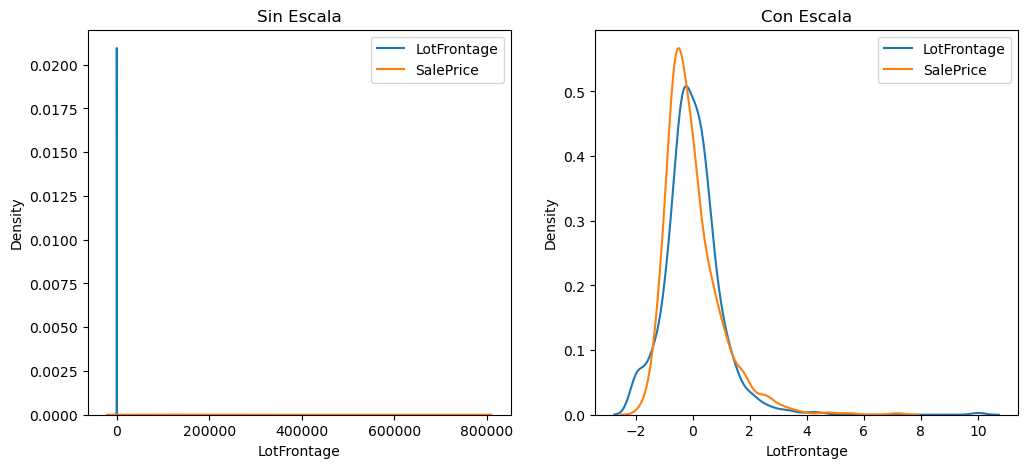

In [371]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))
 
ax1.set_title("Sin Escala")
sns.kdeplot(dataHP_temp['LotFrontage'], ax=ax1, label="LotFrontage")
sns.kdeplot(dataHP_temp['SalePrice'], ax=ax1, label="SalePrice")

ax2.set_title("Con Escala")
sns.kdeplot(dataHP_scaled['LotFrontage'], ax=ax2, label="LotFrontage")
sns.kdeplot(dataHP_scaled['SalePrice'], ax=ax2, label="SalePrice")

ax1.legend()
ax2.legend()

plt.show()